<h1>2020 Kaggle ML - Data science Survey</h1>
<h1>Core Skillset to get to know data science</h1>

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import missingno as msno

import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")   

## Data Import and Glancing

In [5]:
kaggle_2020 = pd.read_csv("kaggle_survey_2020_responses.csv", skiprows=[1])

In [6]:
kaggle_2020.head()

Time from Start to Finish (seconds)     Q1   Q2                        Q3  \
0                                 1838  35-39  Man                  Colombia   
1                               289287  30-34  Man  United States of America   
2                                  860  35-39  Man                 Argentina   
3                                  507  30-34  Man  United States of America   
4                                   78  30-34  Man                     Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
0    Doctoral degree            Student   5-10 years    Python         R   
1    Master’s degree      Data Engineer   5-10 years    Python         R   
2  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
3    Master’s degree     Data Scientist   5-10 years    Python       NaN   
4    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
0       SQL  ...          NaN          NaN          NaN   TensorBoard    
1       SQL  ...          NaN          NaN          NaN            NaN   
2       NaN  ...          NaN          NaN          NaN            NaN   
3       SQL  ...          NaN          NaN          NaN            NaN   
4       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
0          NaN          NaN          NaN          NaN           NaN   
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN          None   
3          NaN          NaN          NaN          NaN           NaN   
4          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 355 columns]

In [7]:
print('Rows and Columns in dataset:', kaggle_2020.shape)

Rows and Columns in dataset: (20036, 355)


In [8]:
display(kaggle_2020.isnull().sum())

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

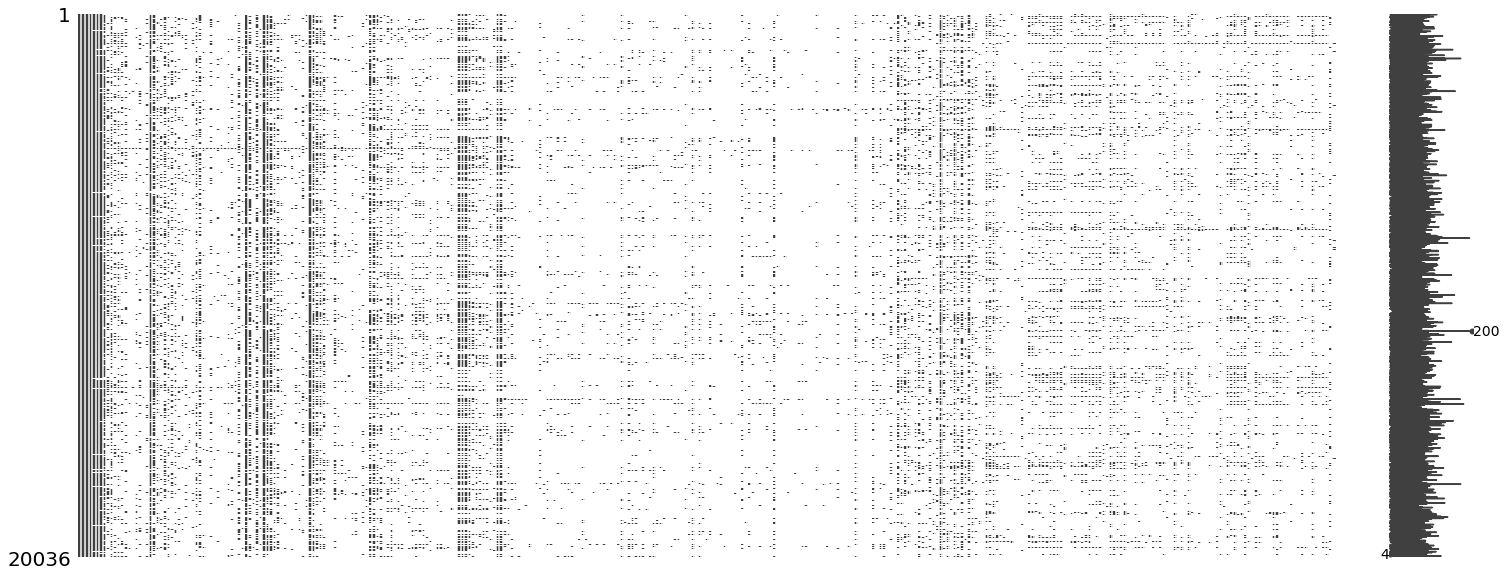

In [9]:
msno.matrix(kaggle_2020, fontsize = 16)
plt.show()

In [10]:
col_dict = {0: 'Duration',
 1: 'Age Group',
 2: 'Gender',
 3: 'Country',
 4: 'Education Level',
 5: 'Job Title',
 6: 'Programming Experience',
 7: 'Python',
 8: 'R',
 9: 'SQL',
 10: 'C',
 11: 'C++',
 12: 'Java',
 13: 'Javascript',
 14: 'Julia',
 15: 'Swift',
 16: 'Bash',
 17: 'MATLAB',
 18: 'Progamming None',
 19: 'Programming Other',
 20: 'Recommended Language',
 21: 'Jupyter (JupyterLab, Jupyter Notebooks, etc)',
 22: 'RStudio',
 23: 'Visual Studio / Visual Studio Code',
 24: 'Click to write Choice 13',
 25: 'PyCharm',
 26: 'Spyder',
 27: 'Notepad++',
 28: 'Sublime Text',
 29: 'Vim / Emacs',
 30: 'MATLAB IDE',
 31: 'IDE None',
 32: 'IDE Other',
 33: 'Kaggle Notebooks',
 34: 'Colab Notebooks',
 35: 'Azure Notebooks',
 36: 'Paperspace / Gradient',
 37: 'Binder / JupyterHub',
 38: 'Code Ocean',
 39: 'IBM Watson Studio',
 40: 'Amazon Sagemaker Studio',
 41: 'Amazon EMR Notebooks',
 42: 'Google Cloud AI Platform Notebooks',
 43: 'Google Cloud Datalab Notebooks',
 44: 'Databricks Collaborative Notebooks',
 45: 'Hosted Notebooks None',
 46: 'Hosted Notebook Other',
 47: 'Most often used Cloud Platform',
 48: 'GPUs',
 49: 'TPUs',
 50: 'Hardware None',
 51: 'Hardware Other',
 52: 'TPU usage experience',
 53: 'Matplotlib',
 54: 'Seaborn',
 55: 'Plotly / Plotly Express',
 56: 'Ggplot / ggplot2',
 57: 'Shiny',
 58: 'D3 js',
 59: 'Altair',
 60: 'Bokeh',
 61: 'Geoplotlib',
 62: 'Leaflet / Folium',
 63: 'Visualization None',
 64: 'Visualization Other',
 65: 'ML Experience',
 66: 'Scikit-learn',
 67: 'TensorFlow',
 68: 'Keras',
 69: 'PyTorch',
 70: 'Fast.ai',
 71: 'MXNet',
 72: 'Xgboost',
 73: 'LightGBM',
 74: 'CatBoost',
 75: 'Prophet',
 76: 'H2O 3',
 77: 'Caret',
 78: 'Tidymodels',
 79: 'JAX',
 80: 'ML None',
 81: 'ML Other',
 82: 'Linear or Logistic Regression',
 83: 'Decision Trees or Random Forests',
 84: 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 85: 'Bayesian Approaches',
 86: 'Evolutionary Approaches',
 87: 'Dense Neural Networks (MLPs, etc)',
 88: 'Convolutional Neural Networks',
 89: 'Generative Adversarial Networks',
 90: 'Recurrent Neural Networks',
 91: 'Transformer Networks (BERT, gpt-3, etc)',
 92: 'ML Algorithms None',
 93: 'ML Algo Other',
 94: 'General purpose image/video tools (PIL, cv2, skimage, etc)',
 95: 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
 96: 'Object detection methods (YOLOv3, RetinaNet, etc)',
 97: 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
 98: 'Generative Networks (GAN, VAE, etc)',
 99: 'CV None',
 100: 'CV Other',
 101: 'Word embeddings/vectors (GLoVe, fastText, word2vec)',
 102: 'Encoder-decorder models (seq2seq, vanilla transformers)',
 103: 'Contextualized embeddings (ELMo, CoVe)',
 104: 'Transformer language models (GPT-3, BERT, XLnet, etc)',
 105: 'NLP None',
 106: 'NLP Other',
 107: 'Company Size',
 108: 'Data Science Team Size',
 109: 'ML Application in Company',
 110: 'Analyze and understand data to influence product or business decisions',
 111: 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
 112: 'Build prototypes to explore applying machine learning to new areas',
 113: 'Build and/or run a machine learning service that operationally improves my product or workflows',
 114: 'Experimentation and iteration to improve existing ML models',
 115: 'Do research that advances the state of the art of machine learning',
 116: 'None of these activities are an important part of my role at work',
 117: 'Work Activity Other',
 118: 'Annual Compensation',
 119: 'ML Spend',
 120: 'Amazon Web Services (AWS)',
 121: 'Microsoft Azure',
 122: 'Google Cloud Platform (GCP)',
 123: 'IBM Cloud / Red Hat',
 124: 'Oracle Cloud',
 125: 'SAP Cloud',
 126: 'Salesforce Cloud',
 127: 'VMware Cloud',
 128: 'Alibaba Cloud',
 129: 'Tencent Cloud',
 130: 'Cloud None',
 131: 'Cloud Other',
 132: 'Amazon EC2',
 133: 'AWS Lambda',
 134: 'Amazon Elastic Container Service',
 135: 'Azure Cloud Services',
 136: 'Microsoft Azure Container Instances',
 137: 'Azure Functions',
 138: 'Google Cloud Compute Engine',
 139: 'Google Cloud Functions',
 140: 'Google Cloud Run',
 141: 'Google Cloud App Engine',
 142: 'Cloud Products None',
 143: 'Cloud Product Other',
 144: 'Amazon SageMaker',
 145: 'Amazon Forecast',
 146: 'Amazon Rekognition',
 147: 'Azure Machine Learning Studio',
 148: 'Azure Cognitive Services',
 149: 'Google Cloud AI Platform / Google Cloud ML Engine',
 150: 'Google Cloud Video AI',
 151: 'Google Cloud Natural Language',
 152: 'Google Cloud Vision AI',
 153: 'ML Products None',
 154: 'ML Prod Other',
 155: 'MySQL',
 156: 'PostgresSQL',
 157: 'SQLite',
 158: 'Oracle Database',
 159: 'MongoDB',
 160: 'Snowflake',
 161: 'IBM Db2',
 162: 'Microsoft SQL Server',
 163: 'Microsoft Access',
 164: 'Microsoft Azure Data Lake Storage',
 165: 'Amazon Redshift',
 166: 'Amazon Athena',
 167: 'Amazon DynamoDB',
 168: 'Google Cloud BigQuery',
 169: 'Google Cloud SQL',
 170: 'Google Cloud Firestore',
 171: 'DW None',
 172: 'DW Other',
 173: 'Most Used Database',
 174: 'Amazon QuickSight',
 175: 'Microsoft Power BI',
 176: 'Google Data Studio',
 177: 'Looker',
 178: 'Tableau',
 179: 'Salesforce',
 180: 'Einstein Analytics',
 181: 'Qlik',
 182: 'Domo',
 183: 'TIBCO Spotfire',
 184: 'Alteryx',
 185: 'Sisense',
 186: 'SAP Analytics Cloud',
 187: 'BI None',
 188: 'BI Other',
 189: 'Most Used BI Tool',
 190: 'Automated data augmentation (e.g. imgaug, albumentations)',
 191: 'Automated feature engineering/selection (e.g. tpot, boruta_py)',
 192: 'Automated model selection (e.g. auto-sklearn, xcessiv)',
 193: 'Automated model architecture searches (e.g. darts, enas)',
 194: 'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
 195: 'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)',
 196: 'Auto ML None',
 197: 'Auto ML Other',
 198: 'Google Cloud AutoML',
 199: 'H20 Driverless AI',
 200: 'Databricks AutoML',
 201: 'DataRobot AutoML',
 202: 'Tpot',
 203: 'Auto-Keras',
 204: 'Auto-Sklearn',
 205: 'Auto_ml',
 206: 'Xcessiv',
 207: 'MLbox',
 208: 'Auto ML Tools None',
 209: 'Auto ML Tools Other',
 210: 'Neptune.ai',
 211: 'Weights & Biases',
 212: 'Comet.ml',
 213: 'Sacred + Omniboard',
 214: 'TensorBoard',
 215: 'Guild.ai',
 216: 'Polyaxon',
 217: 'Trains',
 218: 'Domino Model Monitor',
 219: 'ML Tools None',
 220: 'ML Tools Other',
 221: 'Plotly Dash',
 222: 'Streamlit',
 223: 'NBViewer',
 224: 'GitHub',
 225: 'Personal blog',
 226: 'Kaggle',
 227: 'Colab',
 228: 'Shiny Deploy',
 229: 'I do not share my work publicly',
 230: 'Deploy Other',
 231: 'Coursera',
 232: 'edX',
 233: 'Kaggle Learn Courses',
 234: 'DataCamp',
 235: 'Fast.ai Learning',
 236: 'Udacity',
 237: 'Udemy',
 238: 'LinkedIn Learning',
 239: 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
 240: 'University Courses (resulting in a university degree)',
 241: 'Learn ML None',
 242: 'Learn ML Other',
 243: 'Primary Analysis Tool',
 244: 'Twitter (data science influencers)',
 245: "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
 246: 'Reddit (r/machinelearning, etc)',
 247: 'Kaggle (notebooks, forums, etc)',
 248: 'Course Forums (forums.fast.ai, Coursera forums, etc)',
 249: 'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
 250: 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
 251: 'Blogs (Towards Data Science, Analytics Vidhya, etc)',
 252: 'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
 253: 'Slack Communities (ods.ai, kagglenoobs, etc)',
 254: 'Media None',
 255: 'Media Other',
 256: 'Aspire Amazon Web Services (AWS)',
 257: 'Aspire Microsoft Azure',
 258: 'Aspire Google Cloud Platform (GCP)',
 259: 'Aspire IBM Cloud / Red Hat',
 260: 'Aspire Oracle Cloud',
 261: 'Aspire SAP Cloud',
 262: 'Aspire VMware Cloud',
 263: 'Aspire Salesforce Cloud',
 264: 'Aspire Alibaba Cloud',
 265: 'Aspire Tencent Cloud',
 266: 'Aspire Cloud None',
 267: 'Aspire Cloud Other',
 268: 'Aspire Amazon EC2',
 269: 'Aspire AWS Lambda',
 270: 'Aspire Amazon Elastic Container Service',
 271: 'Aspire Azure Cloud Services',
 272: 'Aspire Microsoft Azure Container Instances',
 273: 'Aspire Azure Functions',
 274: 'Aspire Google Cloud Compute Engine',
 275: 'Aspire Google Cloud Functions',
 276: 'Aspire Google Cloud Run',
 277: 'Aspire Google Cloud App Engine',
 278: 'Aspire Cloud Products None',
 279: 'Aspire Cloud Products Other',
 280: 'Aspire Amazon SageMaker',
 281: 'Aspire Amazon Forecast',
 282: 'Aspire Amazon Rekognition',
 283: 'Aspire Azure Machine Learning Studio',
 284: 'Aspire Azure Cognitive Services',
 285: 'Aspire Google Cloud AI Platform / Google Cloud ML Engine',
 286: 'Aspire Google Cloud Video AI',
 287: 'Aspire Google Cloud Natural Language',
 288: 'Aspire Google Cloud Vision AI',
 289: 'Aspire ML None',
 290: 'Aspire ML Other',
 291: 'Aspire MySQL',
 292: 'Aspire PostgresSQL',
 293: 'Aspire SQLite',
 294: 'Aspire Oracle Database',
 295: 'Aspire MongoDB',
 296: 'Aspire Snowflake',
 297: 'Aspire IBM Db2',
 298: 'Aspire Microsoft SQL Server',
 299: 'Aspire Microsoft Access',
 300: 'Aspire Microsoft Azure Data Lake Storage',
 301: 'Aspire Amazon Redshift',
 302: 'Aspire Amazon Athena',
 303: 'Aspire Amazon DynamoDB',
 304: 'Aspire Google Cloud BigQuery',
 305: 'Aspire Google Cloud SQL',
 306: 'Aspire Google Cloud Firestore',
 307: 'Aspire DW None',
 308: 'Aspire DW Other',
 309: 'Aspire Microsoft Power BI',
 310: 'Aspire Amazon QuickSight',
 311: 'Aspire Google Data Studio',
 312: 'Aspire Looker',
 313: 'Aspire Tableau',
 314: 'Aspire Salesforce',
 315: 'Aspire Einstein Analytics',
 316: 'Aspire Qlik',
 317: 'Aspire Domo',
 318: 'Aspire TIBCO Spotfire',
 319: 'Aspire Alteryx',
 320: 'Aspire Sisense',
 321: 'Aspire SAP Analytics Cloud',
 322: 'Aspire BI None',
 323: 'Aspire BI Other',
 324: 'Aspire Automated data augmentation (e.g. imgaug, albumentations)',
 325: 'Aspire Automated feature engineering/selection (e.g. tpot, boruta_py)',
 326: 'Aspire Automated model selection (e.g. auto-sklearn, xcessiv)',
 327: 'Aspire Automated model architecture searches (e.g. darts, enas)',
 328: 'Aspire Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)',
 329: 'Aspire Automation of full ML pipelines (e.g. Google Cloud AutoML, H20 Driverless AI)',
 330: 'Aspire AutoML None',
 331: 'Aspire AutoML Other',
 332: 'Aspire Google Cloud AutoML',
 333: 'Aspire H20 Driverless AI',
 334: 'Aspire Databricks AutoML',
 335: 'Aspire DataRobot AutoML',
 336: 'Aspire Tpot',
 337: 'Aspire Auto-Keras',
 338: 'Aspire Auto-Sklearn',
 339: 'Aspire Auto_ml',
 340: 'Aspire Xcessiv',
 341: 'Aspire MLbox',
 342: 'Aspire AutoML B None',
 343: 'Aspire AutoML B Other',
 344: 'Aspire Neptune.ai',
 345: 'Aspire Weights & Biases',
 346: 'Aspire Comet.ml',
 347: 'Aspire Sacred + Omniboard',
 348: 'Aspire TensorBoard',
 349: 'Aspire Guild.ai',
 350: 'Aspire Polyaxon',
 351: 'Aspire Trains',
 352: 'Aspire Domino Model Monitor',
 353: 'Aspire ML Tools  None',
 354: 'Aspire ML Tools Other'}

kaggle_2020.columns = np.arange(len(kaggle_2020.columns))
kaggle_2020 = kaggle_2020.rename(columns = col_dict)

# Drop mising salaries
kaggle_2020.dropna(subset=["Annual Compensation"], inplace=True)

In [11]:
# Bucket Salaries

salary_dict = {
    'Missing' : 'Missing' ,
    '$0-999' : 'Less than 10k' ,
    '1,000-1,999' : 'Less than 10k' ,
    '2,000-2,999' : 'Less than 10k' ,
    '3,000-3,999' : 'Less than 10k' ,
    '4,000-4,999' : 'Less than 10k' ,
    '5,000-7,499' : 'Less than 10k' ,
    '7,500-9,999' : 'Less than 10k' ,
    '10,000-14,999' : '10k to 50k' ,
    '15,000-19,999' : '10k to 50k' ,
    '20,000-24,999' : '10k to 50k' ,
    '25,000-29,999' : '10k to 50k' ,
    '30,000-39,999' : '10k to 50k' ,
    '40,000-49,999' : '10k to 50k' ,
    '50,000-59,999' : '50k to 80k' ,
    '60,000-69,999' : '50k to 80k' ,
    '70,000-79,999' : '50k to 80k' ,
    '100,000-124,999' : '80k to 150k' ,
    '125,000-149,999' : '80k to 150k' ,
    '80,000-89,999' : '80k to 150k' ,
    '90,000-99,999' : '80k to 150k' ,
    '> $500,000' : '150k and above' ,
    '150,000-199,999' : '150k and above' ,
    '200,000-249,999' : '150k and above' ,
    '250,000-299,999' : '150k and above' ,
    '300,000-500,000' : '150k and above'
}

kaggle_2020["Earnings"] = kaggle_2020["Annual Compensation"].replace(salary_dict)

# Create order list
chart_order = CategoricalDtype(
    ["Less than 10k", "10k to 50k", "50k to 80k", "80k to 150k", "150k and above"], 
    ordered=True
)

chart_order_list  = ["Less than 10k", "10k to 50k", "50k to 80k", "80k to 150k", "150k and above"]

agg_earnings = kaggle_2020["Earnings"].value_counts(sort = False).to_frame().rename(columns = {"Earnings" : "count"} )

## Data mapping and initializing Dashboard

In [14]:
# Create Data Wrangling and Dashboard functions


# For Y/N fields
def cross_tab_row(input_df, varname, index_var, out_text):
    
    out_df = pd.crosstab(columns = input_df[varname], index = input_df[index_var],
                         values = input_df[index_var], aggfunc = "count").fillna(0)
    
    out_df.columns = np.arange(len(out_df.columns))
    out_df.rename(columns = {0 : "count"}, inplace = True)

    overall_val = input_df[varname].dropna().value_counts()[0] / input_df.shape[0]
    out_df = out_df.div(agg_earnings).reset_index().rename(columns = {"index" : index_var}).reset_index(drop = True)
    out_df[varname] = out_df["count"] / overall_val * 100
    out_df[varname].fillna(0, inplace = True)
    out_df.drop(columns = {"count"}, inplace = True)
    index_range = max(out_df[varname]) - min(out_df[varname])
    min_val = min(out_df[varname])
    max_val = max(out_df[varname])
    out_df[index_var] = out_df[index_var].astype(chart_order)
    out_df.sort_values(index_var, inplace = True)
    
    return out_df, overall_val, index_range, min_val, max_val, out_text


# For Multiple Choice Fields
def cross_tab_mat(input_df, varname, index_var):
    out_list = []
    agg_earnings_mat = pd.crosstab(index = input_df[index_var], columns = input_df[varname], values = input_df[varname], aggfunc = "count", margins = True, margins_name = "Overall", normalize = "columns").fillna(0)
    agg_earnings_mat = agg_earnings_mat.loc[agg_earnings_mat["Overall"] >= 0.05]
    overall_vals = agg_earnings_mat[["Overall"]]
    agg_earnings_mat = agg_earnings_mat.T.drop("Overall")
    cols_list = agg_earnings_mat.columns.to_list()
    for col in cols_list:
        base_val = overall_vals.loc[col, "Overall"]
        out_df = agg_earnings_mat[[col]].reset_index()
        out_df[col] = out_df[col]/ base_val * 100
        index_range = max(out_df[col]) - min(out_df[col])
        min_val = min(out_df[col])
        max_val = max(out_df[col])
        out_df["Earnings"] = out_df["Earnings"].astype(chart_order)
        out_df.sort_values("Earnings", inplace = True)
        row_list = [out_df, base_val, index_range, min_val, max_val, col]
        out_list.append(row_list)
    
    return out_list


# setup fonts
headfont = {'fontname':'DejaVu Sans'}
subphfont = {'fontname':'DejaVu Sans'}
axisfont = {'fontname':'DejaVu Sans'}

# Create Chart Functions
def create_plot(input_list, subptitle_inp):
    
    N = len(input_list)
    plt.close()
    #set style
    sns.set_style("white")
    fig = plt.figure(constrained_layout=True, figsize = (12 ,(2.5 * N)))
    fig.set_dpi(100)
    fig.set_constrained_layout_pads(hspace=0.2, wspace=0.1)
    gs = fig.add_gridspec(nrows = N, ncols = 3)
    
    fig.suptitle(subptitle_inp, fontsize=20, x = 0.0, ha = "left", y = 1.04, va = "top", **headfont, fontweight = "bold")
    fig.text(x = 0.85, y = 1.03, s = "Incidence", fontsize=20, fontweight = "medium", **headfont)

    # create the axes
    axs = []
    paxs = []
    
    for i in range(N):
        # Set plot title
        plot_title = input_list[i][-1]
        # Get plot data
        input_df = input_list[i][0]
        # Set limits
        min_idx = int(input_list[i][3] / 10) * 10
        max_idx = int(input_list[i][4] / 10) * 10 + 30
        ylim_min = min(60, min_idx)
        ylim_max = max(140, max_idx)
        # Set colors
        idx_range = input_list[i][2]
        max_earn_idx = float(input_list[i][0].loc[input_list[i][0]["Earnings"] == "150k and above"].iloc[:,1])
        min_earn_idx = float(input_list[i][0].loc[input_list[i][0]["Earnings"] == "Less than 10k"].iloc[:,1])
        if idx_range < 30:
            lcolor = "royalblue"
            fill_color = "aqua"
        elif ((max_earn_idx < 100 and min_earn_idx < 100) or (max_earn_idx > 100 and min_earn_idx > 100)):
            lcolor = "royalblue"
            fill_color = "aqua"
        elif max_earn_idx < 100:
            lcolor = "red"
            fill_color = "tomato"
        else:
            lcolor = "forestgreen"
            fill_color = "lime"
    
        axs.append(fig.add_subplot(gs[i, :-1]))
        axs[i].set_title(plot_title, fontsize=16, x = 0.05, y = 0.9, ha = "left", **subphfont, fontweight = "medium")
        x = np.arange(5)
        y = input_df.iloc[:,-1]
        plt.xticks(np.arange(5), chart_order_list, ha = "center", fontsize = 12, **axisfont)
        plt.grid(color = "gray", linewidth = 1.5, linestyle = "-", axis = "y", alpha = 0.1)
        plt.yticks(fontsize = 12, **axisfont)
        axs[i].margins(x = 0.05, y = 0)
        axs[i].plot(x, y, color=lcolor, lw=2)
        plt.ylim(bottom = ylim_min, top = ylim_max)
        axs[i].fill_between(x,100, y, color = fill_color, alpha = 0.6)

        # Add pie charts
        paxs.append(fig.add_subplot(gs[i,-1]))
        col_pal = plt.cm.cool
        paxs[i].axis('equal')
        pie_val = input_list[i][1]
        group_size = [pie_val,1-pie_val] 
        mypie, _ = paxs[i].pie(group_size, radius=1.2, colors=[col_pal(pie_val), "white"], startangle = 90)
        plt.setp( mypie, width=0.8, edgecolor='white')
        paxs[i].text(x = 0., y = 0.8, s = "{:.0%}".format(pie_val), fontsize=18, **axisfont)

    sns.despine()
    plt.show();

# Data Analysis - Assumptions for Basic EDA

 ## Core Attributes

- Incidence: Ratio of people who have skills (All Income)
- Index: Relative importance of skill in Incidence-based income estimation

## Companies' scale and payrolls

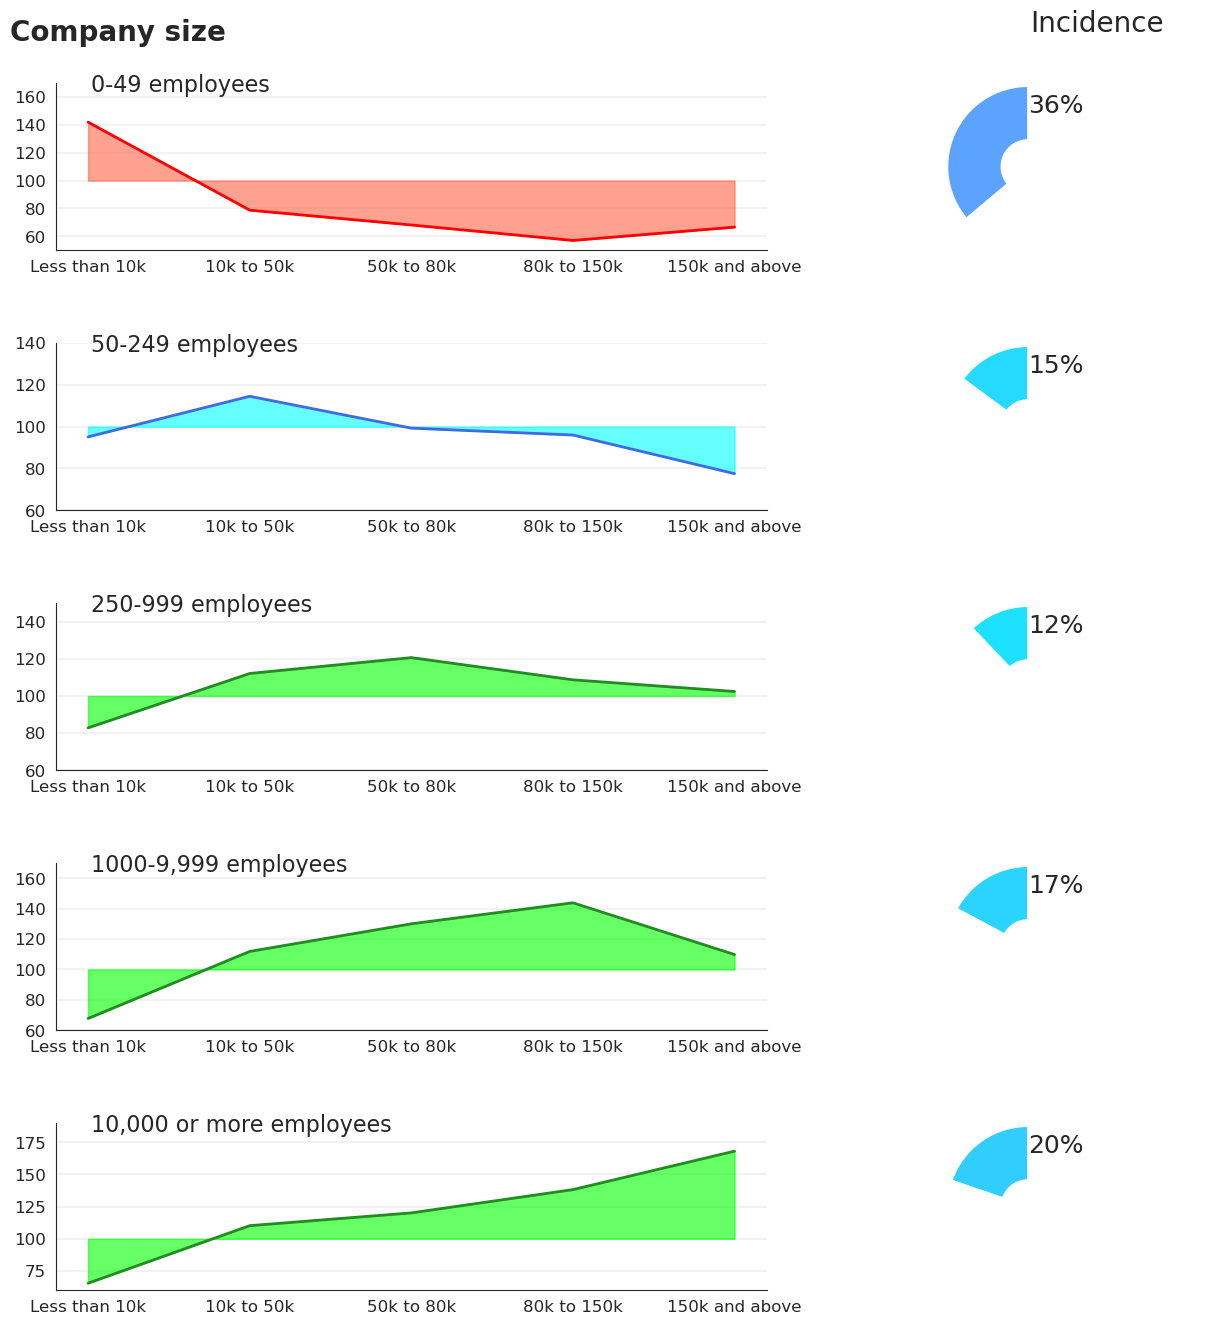

In [15]:
# Company Size
kaggle_2020["Company Size"].value_counts(dropna = False)

company_size_order = CategoricalDtype(
    ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"], 
    ordered=True
)

company_size_list = ["0-49 employees", "50-249 employees", "250-999 employees", "1000-9,999 employees", "10,000 or more employees"] 

kaggle_2020["Company Size"] = kaggle_2020["Company Size"].astype(company_size_order)
kaggle_2020.sort_values("Company Size", inplace = True)
csize_list = cross_tab_mat(kaggle_2020[["Earnings", "Company Size"]], "Earnings", "Company Size")
create_plot(csize_list, "Company size")

There is direct correlation between income and company's size

* Huge big techs: higher payrolls and competitive benefits
* Financial stability to produce data science and machine learning infrastructure to their employees
* Continuous learning and additional benefits such as promotion or income negotiations (vitruous circle)
* Can be more exposed to similar employees

🎯**It would be the better way to change jobs to big techs**


## Data Science team's size and income

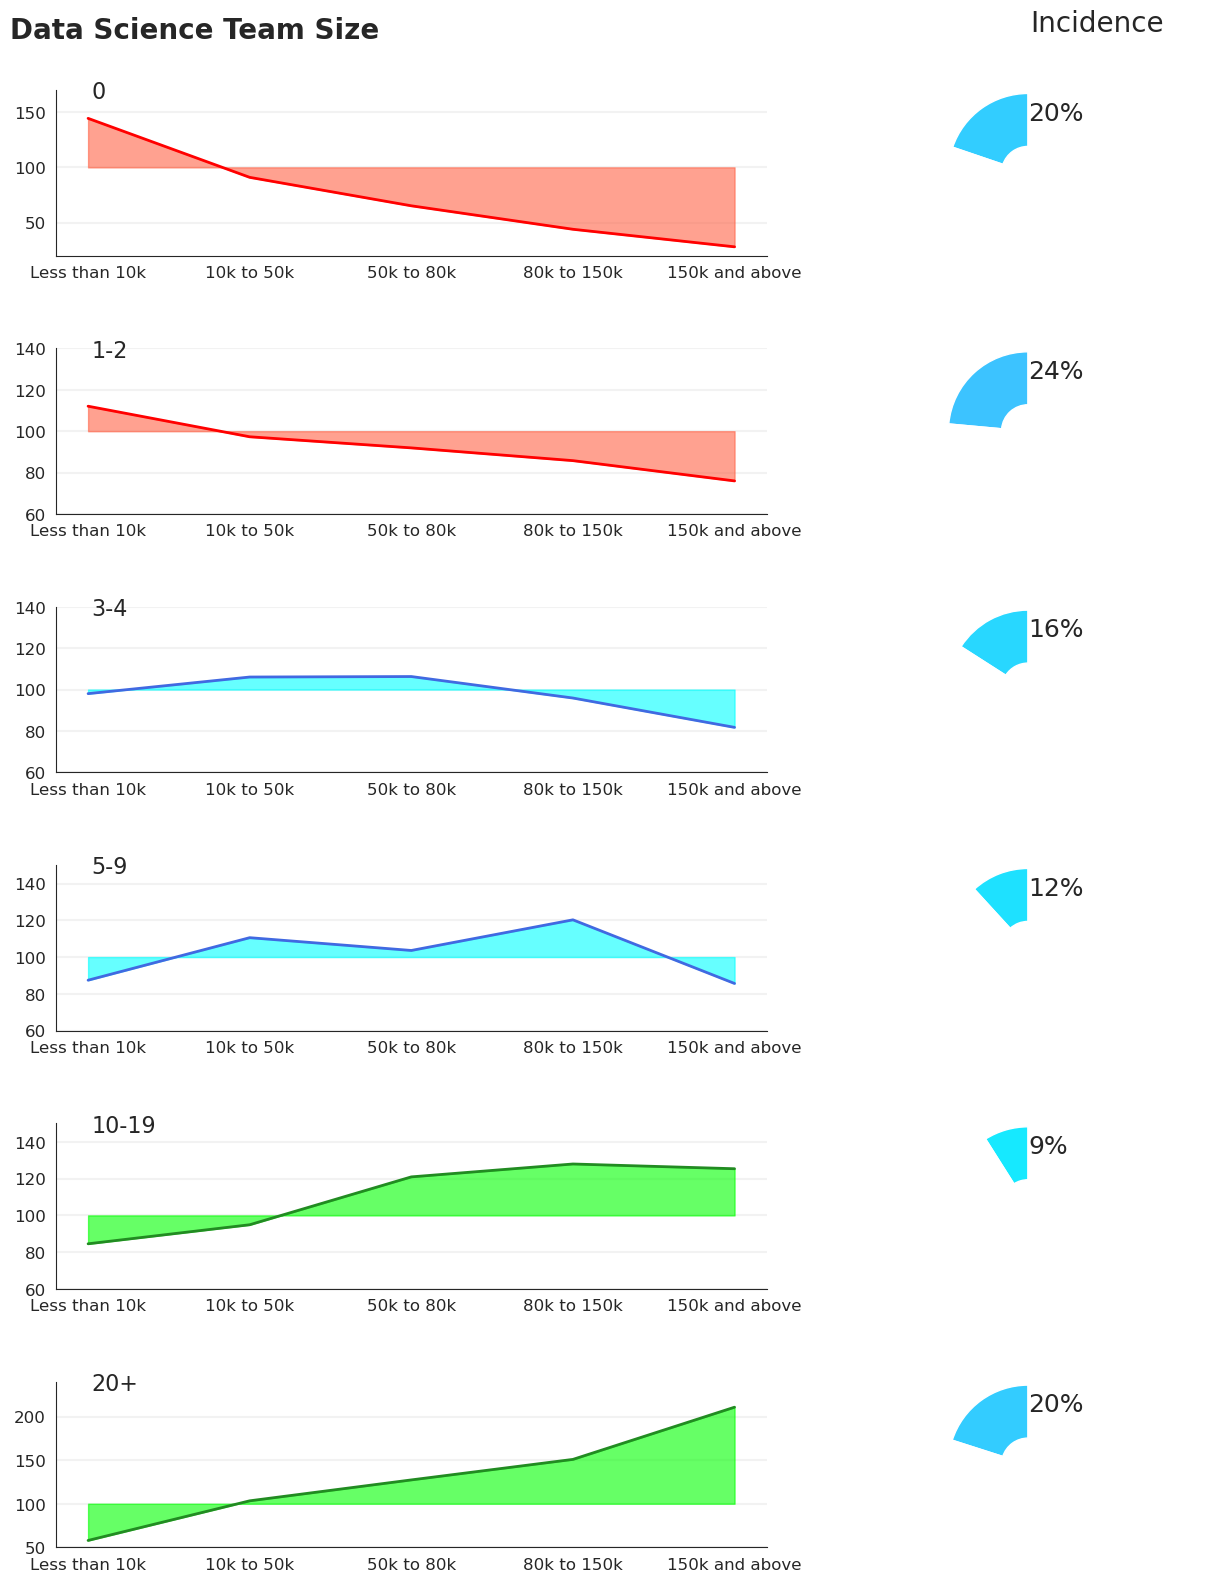

In [16]:
# Data Science Team Size

kaggle_2020["Data Science Team Size"] = kaggle_2020["Data Science Team Size"].apply(lambda x: "10-19" if x in ["10-14", "15-19"] else x)

ds_team_size_order = CategoricalDtype(
    ["0", "1-2", "3-4", "5-9", "10-19", "20+"], 
    ordered=True
)

ds_team_list = ["0", "1-2", "3-4", "5-9", "10-19", "20+"]

kaggle_2020["Data Science Team Size"] = kaggle_2020["Data Science Team Size"].astype(ds_team_size_order)
kaggle_2020.sort_values("Data Science Team Size", inplace = True)
ds_team_list = cross_tab_mat(kaggle_2020[["Earnings", "Data Science Team Size"]], "Earnings", "Data Science Team Size")
create_plot(ds_team_list, "Data Science Team Size")

There is also correlation between income and DSC team's size

🎯**Also reasonable to work with Huge size of DSC team**

## Machine Learning Usage

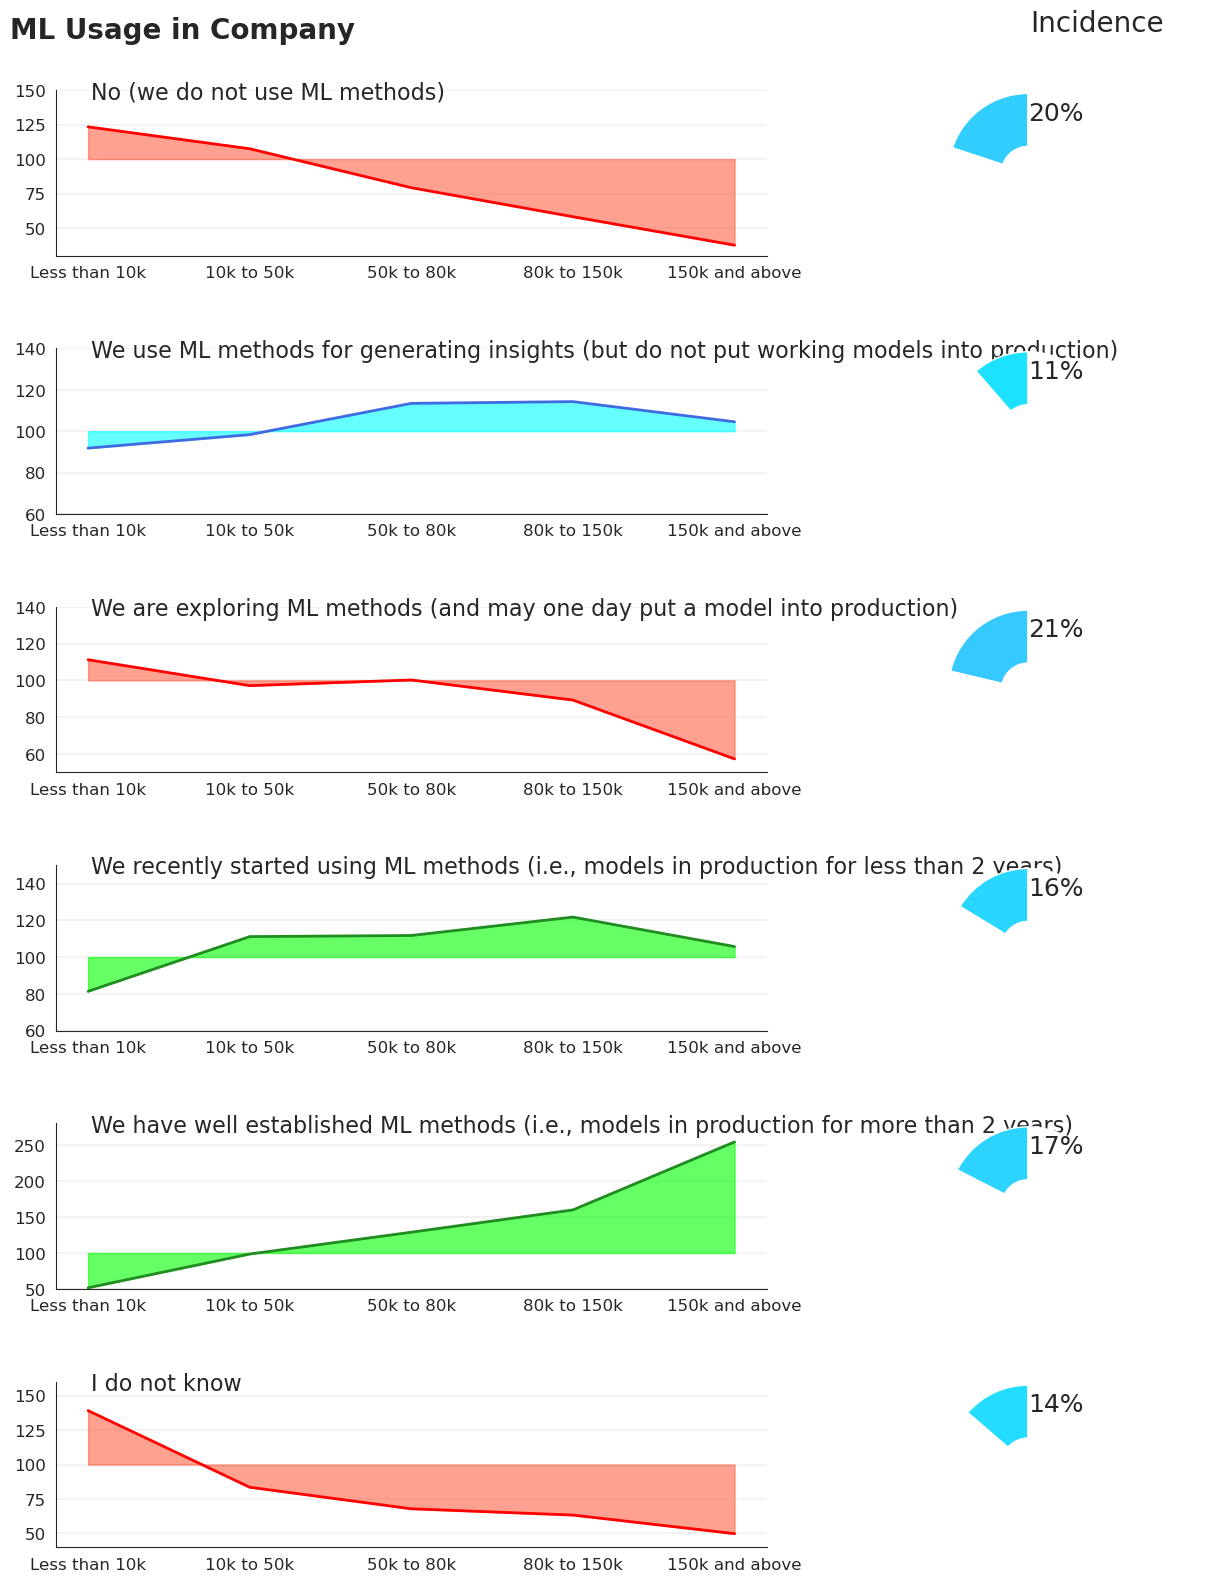

In [17]:
# ML Usage in Company
ml_usage_order = CategoricalDtype(["No (we do not use ML methods)", 
                                  "We use ML methods for generating insights (but do not put working models into production)",
                                  "We are exploring ML methods (and may one day put a model into production)",
                                  "We recently started using ML methods (i.e., models in production for less than 2 years)",
                                  "We have well established ML methods (i.e., models in production for more than 2 years)",
                                  "I do not know"], ordered=True
                                 )

ml_usage_list = ["No11 (we do not use ML methods)", 
                "We use ML methods for generating insights (but do not put working models into production)",
                "We are exploring ML methods (and may one day put a model into production)",
                "We recently started using ML methods (i.e., models in production for less than 2 years)",
                "We have well established ML methods (i.e., models in production for more than 2 years)",
                "I do not know"]

kaggle_2020["ML Application in Company"] = kaggle_2020["ML Application in Company"].astype(ml_usage_order)
kaggle_2020.sort_values("ML Application in Company", inplace = True)
ml_use_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Application in Company"]], "Earnings", "ML Application in Company")
create_plot(ml_use_list, "ML Usage in Company")

## Countries

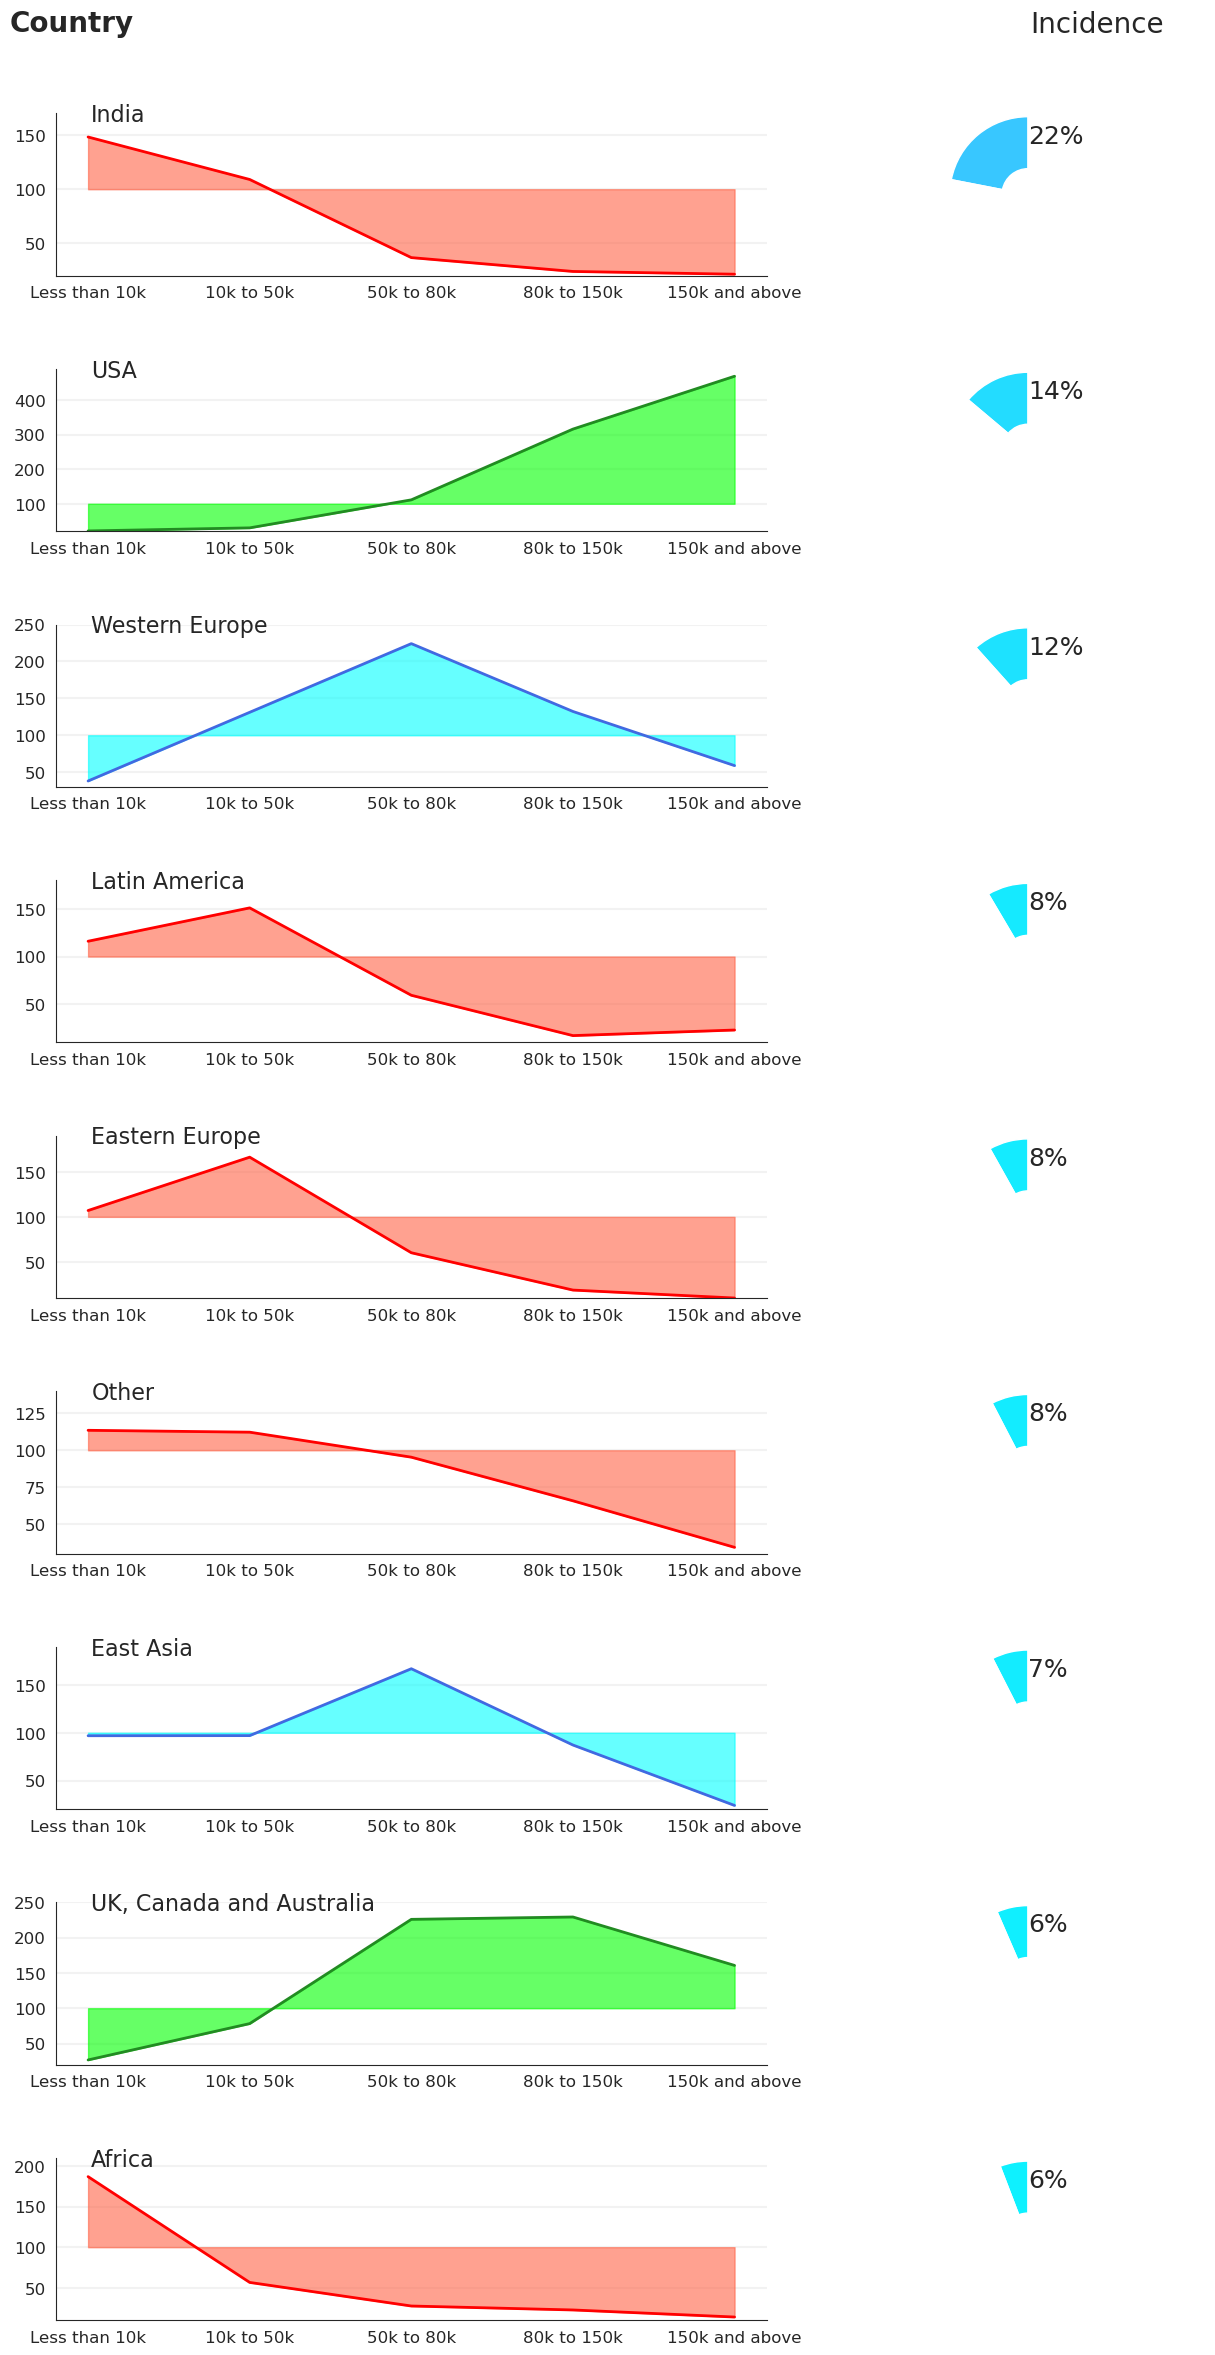

In [18]:
# Country

country_dict = {
'India' : 'India',
'United States of America' : 'USA',
'Other' : 'Other',
'Brazil' : 'Latin America',
'Japan' : 'East Asia',
'Russia' : 'Eastern Europe',
'United Kingdom of Great Britain and Northern Ireland' : 'UK, Canada and Australia',
'Nigeria' : 'Africa',
'China' : 'East Asia',
'Germany' : 'Western Europe',
'Turkey' : 'Eastern Europe',
'Spain' : 'Western Europe',
'France' : 'Western Europe',
'Canada' : 'UK, Canada and Australia',
'Indonesia' : 'South East Asia',
'Pakistan' : 'South Asia',
'Italy' : 'Western Europe',
'Taiwan' : 'East Asia',
'Australia' : 'UK, Canada and Australia',
'Mexico' : 'Latin America',
'South Korea' : 'East Asia',
'Egypt' : 'Africa',
'Colombia' : 'Latin America',
'Ukraine' : 'Eastern Europe',
'Iran, Islamic Republic of...' : 'West Asia',
'Kenya' : 'Africa',
'Netherlands' : 'Western Europe',
'Singapore' : 'South East Asia',
'Poland' : 'Eastern Europe',
'Viet Nam' : 'South East Asia',
'Bangladesh' : 'South Asia',
'South Africa' : 'Africa',
'Argentina' : 'Latin America',
'Morocco' : 'Africa',
'Malaysia' : 'South East Asia',
'Thailand' : 'South East Asia',
'Portugal' : 'Western Europe',
'Greece' : 'Eastern Europe',
'Philippines' : 'South East Asia',
'Tunisia' : 'Africa',
'Israel' : 'West Asia',
'Peru' : 'Latin America',
'Chile' : 'Latin America',
'Sweden' : 'Western Europe',
'Saudi Arabia' : 'West Asia',
'Republic of Korea' : 'East Asia',
'Sri Lanka' : 'South Asia',
'Switzerland' : 'Western Europe',
'Nepal' : 'South Asia',
'Romania' : 'Eastern Europe',
'Belgium' : 'Western Europe',
'United Arab Emirates' : 'West Asia',
'Belarus' : 'Eastern Europe',
'Ireland' : 'Western Europe',
'Ghana' : 'Africa'
}
kaggle_2020["Region"] = kaggle_2020["Country"].replace(country_dict)
country_list = cross_tab_mat(kaggle_2020[["Earnings", "Region"]], "Earnings", "Region")
country_list.sort(key=lambda x: x[1], reverse = True)
create_plot(country_list, "Country")

The result varies among different continents

* America == The land of opportunities
* Next, UK, Canada, and Austrailia follows
* Low income in other continents including Western Europe

`It might be caused by low response from Western Europe`

* India - Very competitive, Rarely top high-income jobs exist.


🎯 **If you want to learn `Data Science`, keep your eyes on the USA**

## What to do next

Let's assume that you have moved to appropriate location for the job above.

What would be recommended to get a niche data science job?

## Role

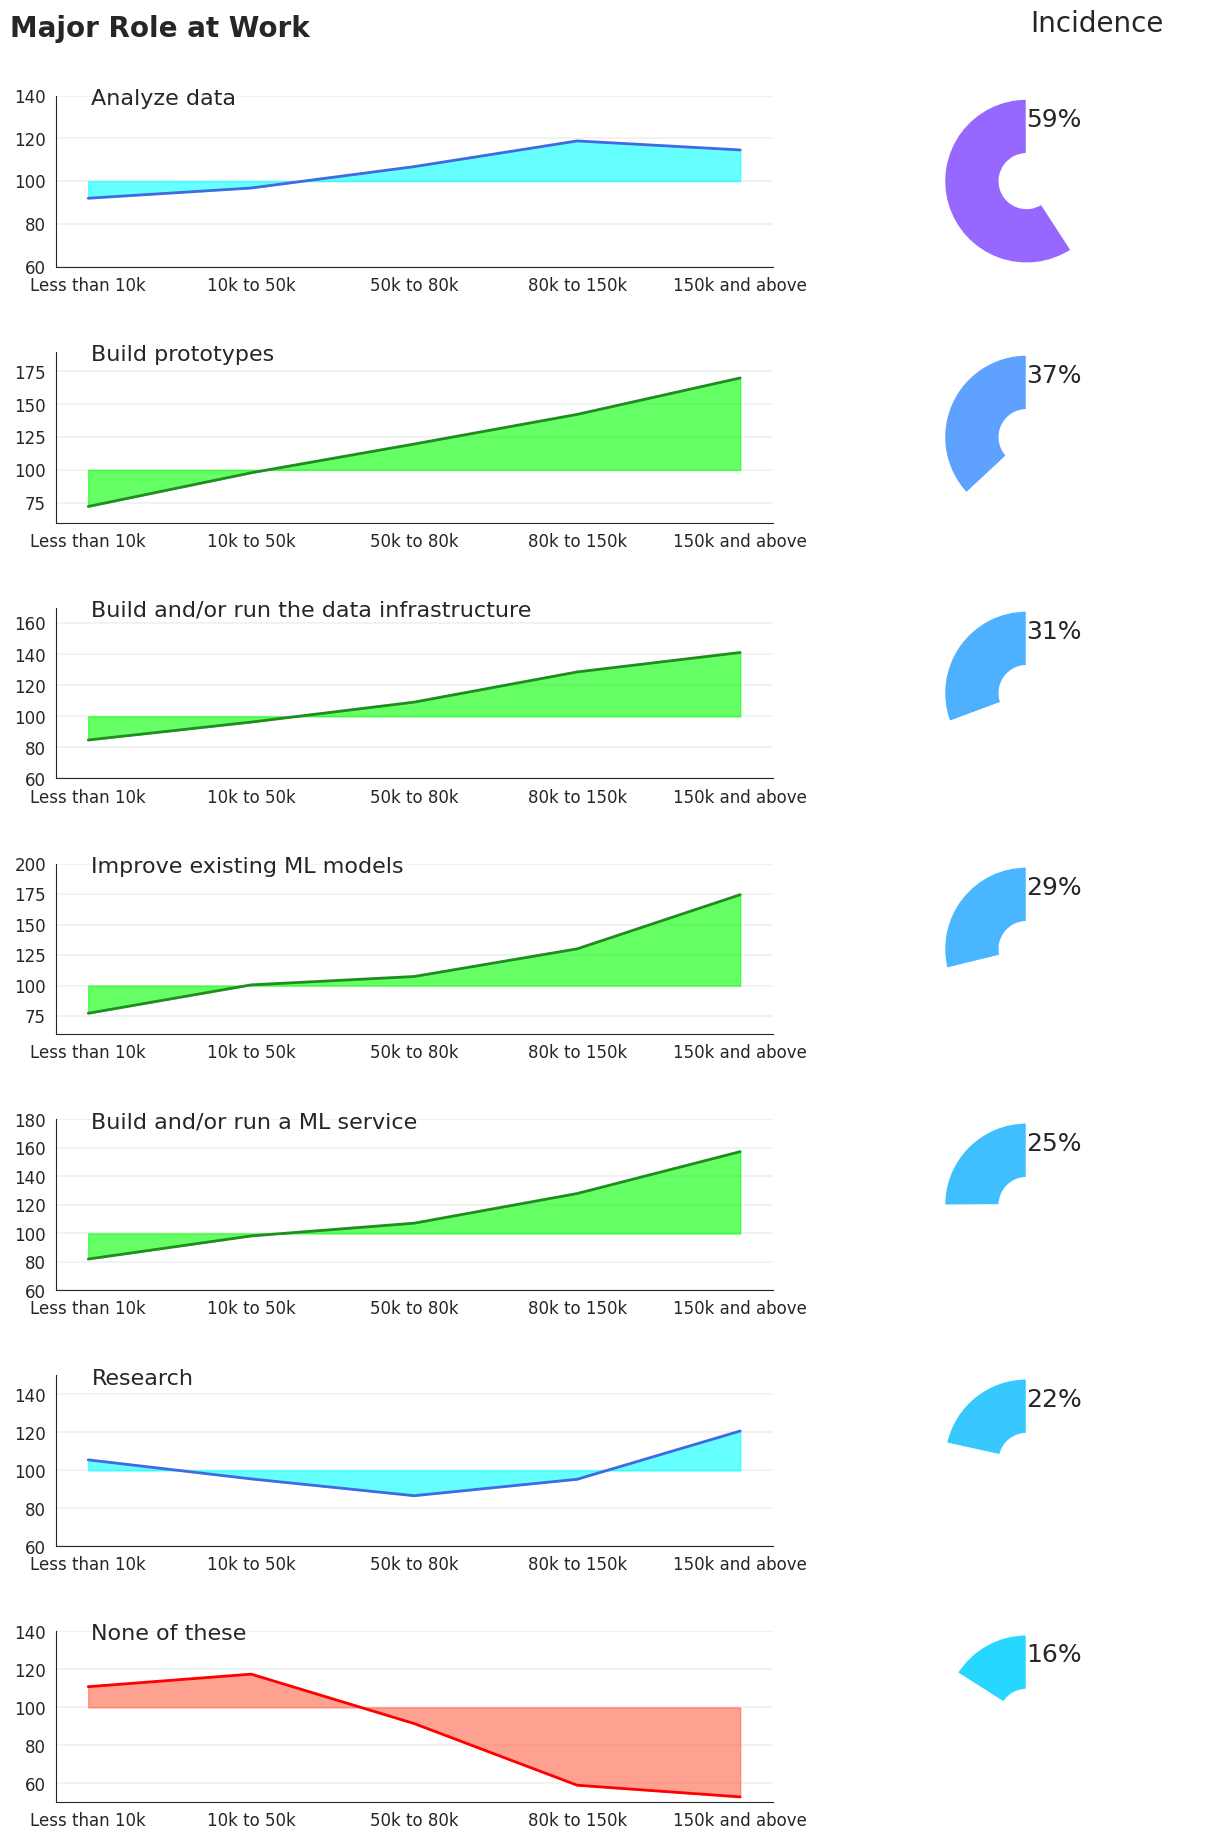

In [21]:
# Role at work

work_role = ['Analyze and understand data to influence product or business decisions',
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
    'Build prototypes to explore applying machine learning to new areas',
    'Build and/or run a machine learning service that operationally improves my product or workflows',
    'Experimentation and iteration to improve existing ML models',
    'Do research that advances the state of the art of machine learning',
    'None of these activities are an important part of my role at work',
    'Work Activity Other'
]

work_role_out = ['Analyze data',
    'Build and/or run the data infrastructure',
    'Build prototypes',
    'Build and/or run a ML service',
    'Improve existing ML models',
    'Research',
    'None of these',
    'Work Activity Other'
]

work_role_list = []
i = 0
for list_val in work_role:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", work_role_out[i])
    if ct_out[1] >= 0.1:
        work_role_list.append(ct_out)
    i +=1

# sort output list
work_role_list.sort(key = lambda x:x[1], reverse = True)

create_plot(work_role_list, "Major Role at Work")

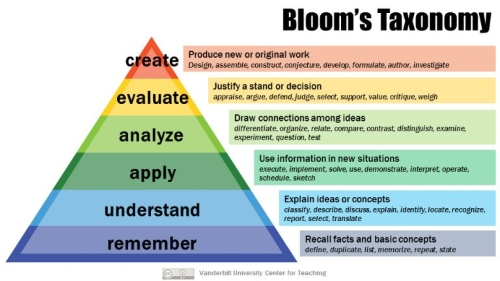

There are many responsibilities among same type of Data Science job field

Role-Payroll bonding is mostly from [Bloom's taxonomy](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/#:~:text=Familiarly%20known%20as%20Bloom's%20Taxonomy,Analysis%2C%20Synthesis%2C%20and%20Evaluation.)


* `Data Analytics` has the nice future possibilities, but will be harsh to compete in the payroll field
* Probably `Data Analytics` would work as a toehold to step-up to Data Science field
* Also, researcher acouldn't much earned worthy. Data Science is not much close to Science.

🎯 **To earn money with Data Science, you should get your hands dirty**

## Job Title

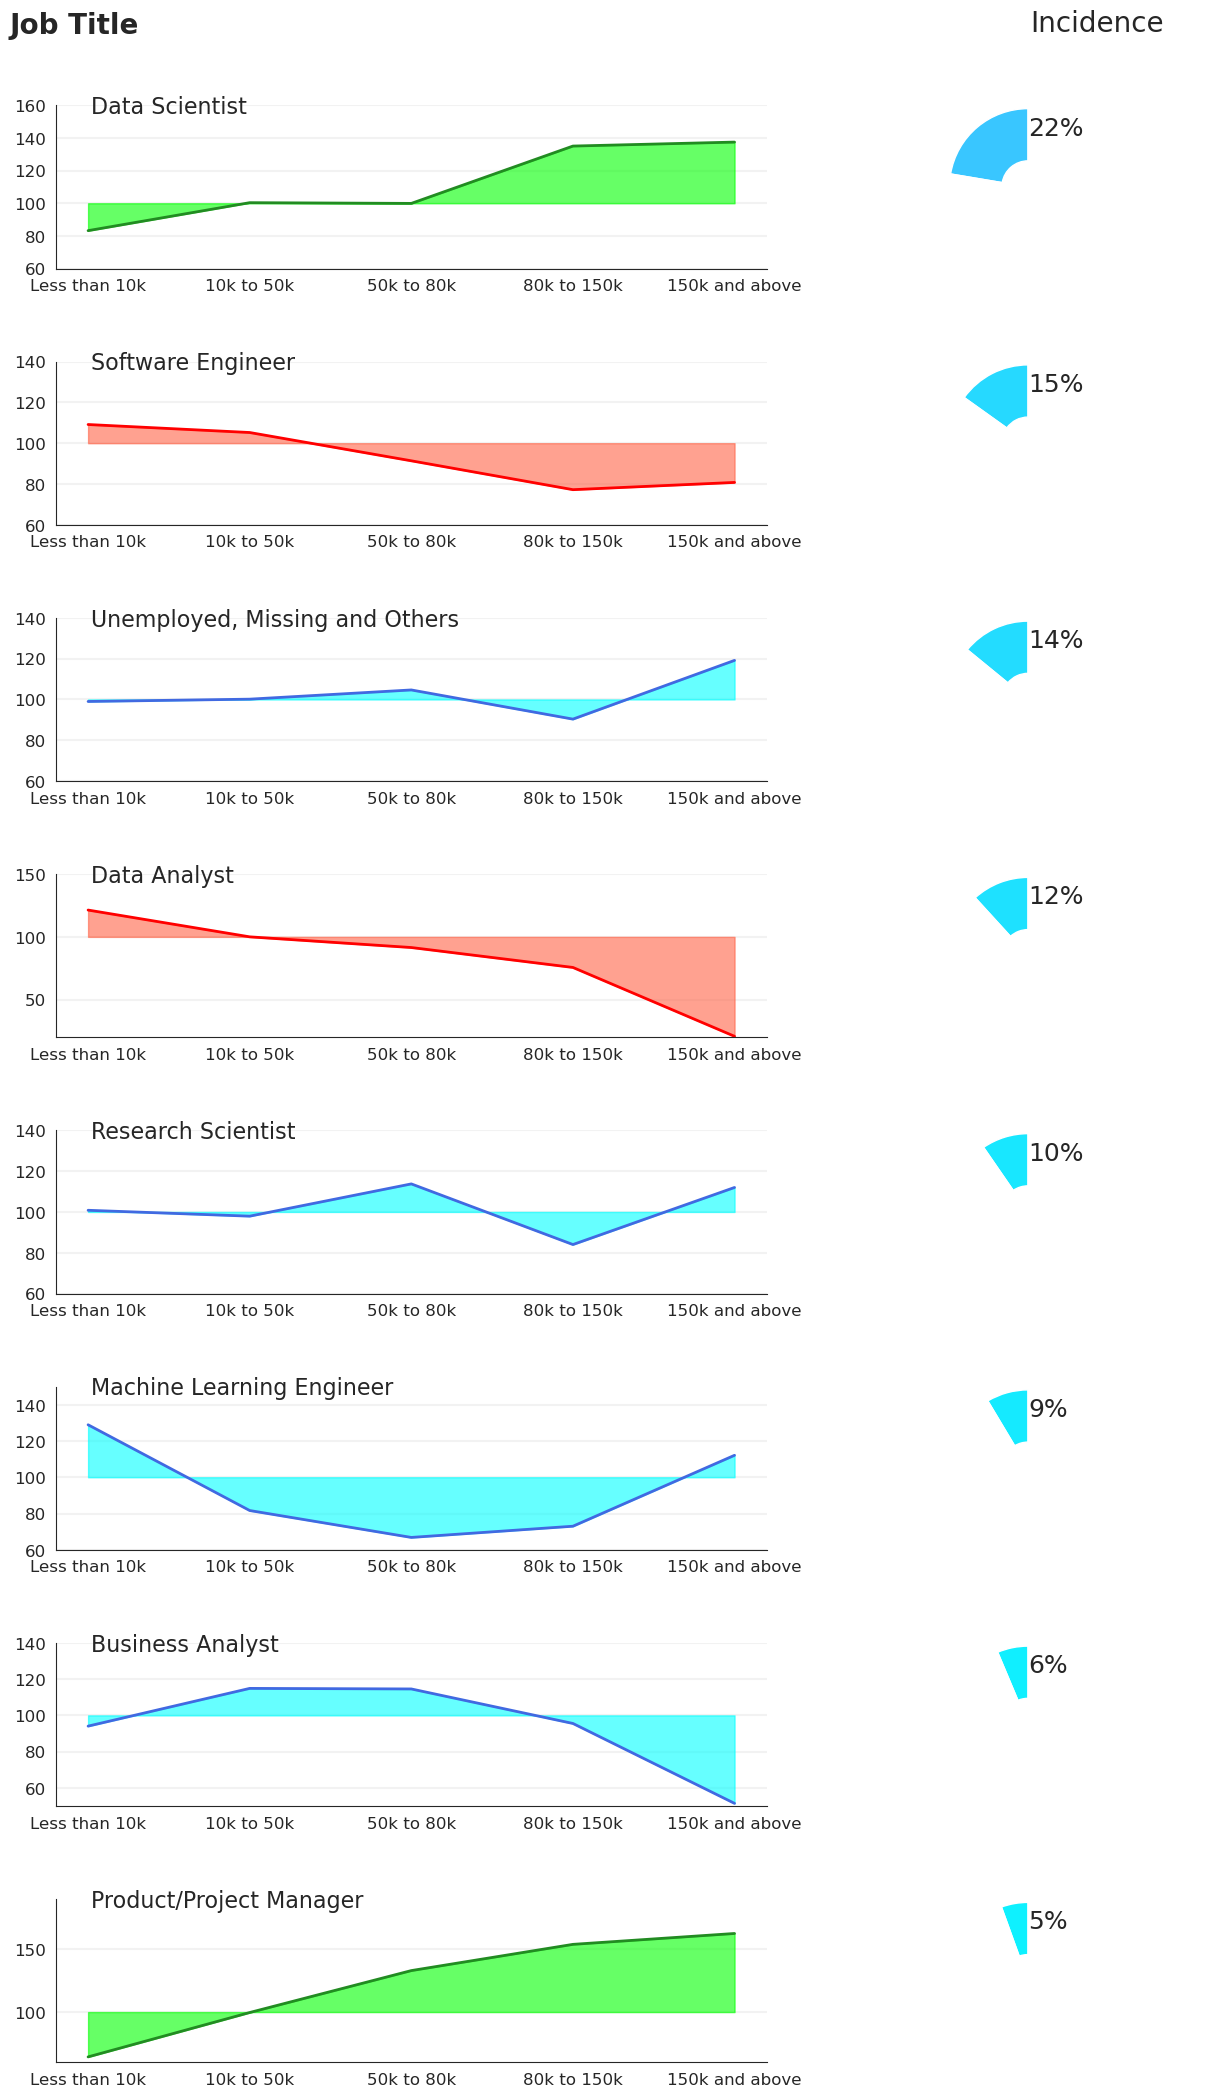

In [19]:
# Job Title
kaggle_2020["Job Title"].fillna("Missing", inplace = True)
kaggle_2020["Job Title"] = kaggle_2020["Job Title"].apply(lambda x: "Unemployed, Missing and Others" if x in ["Currently not employed", "Missing", "Other"] else x)
job_list = cross_tab_mat(kaggle_2020[["Earnings", "Job Title"]], "Earnings", "Job Title")
job_list.sort(key=lambda x: x[1], reverse = True)
create_plot(job_list, "Job Title")

Mostly correlated with actual role in the job title.

* Every ML/DS job doesn't have the same role
* Product Manager usually earn more than researchers and engineers, as expected

🎯 **You can ern as much as you work**

## ML Experience

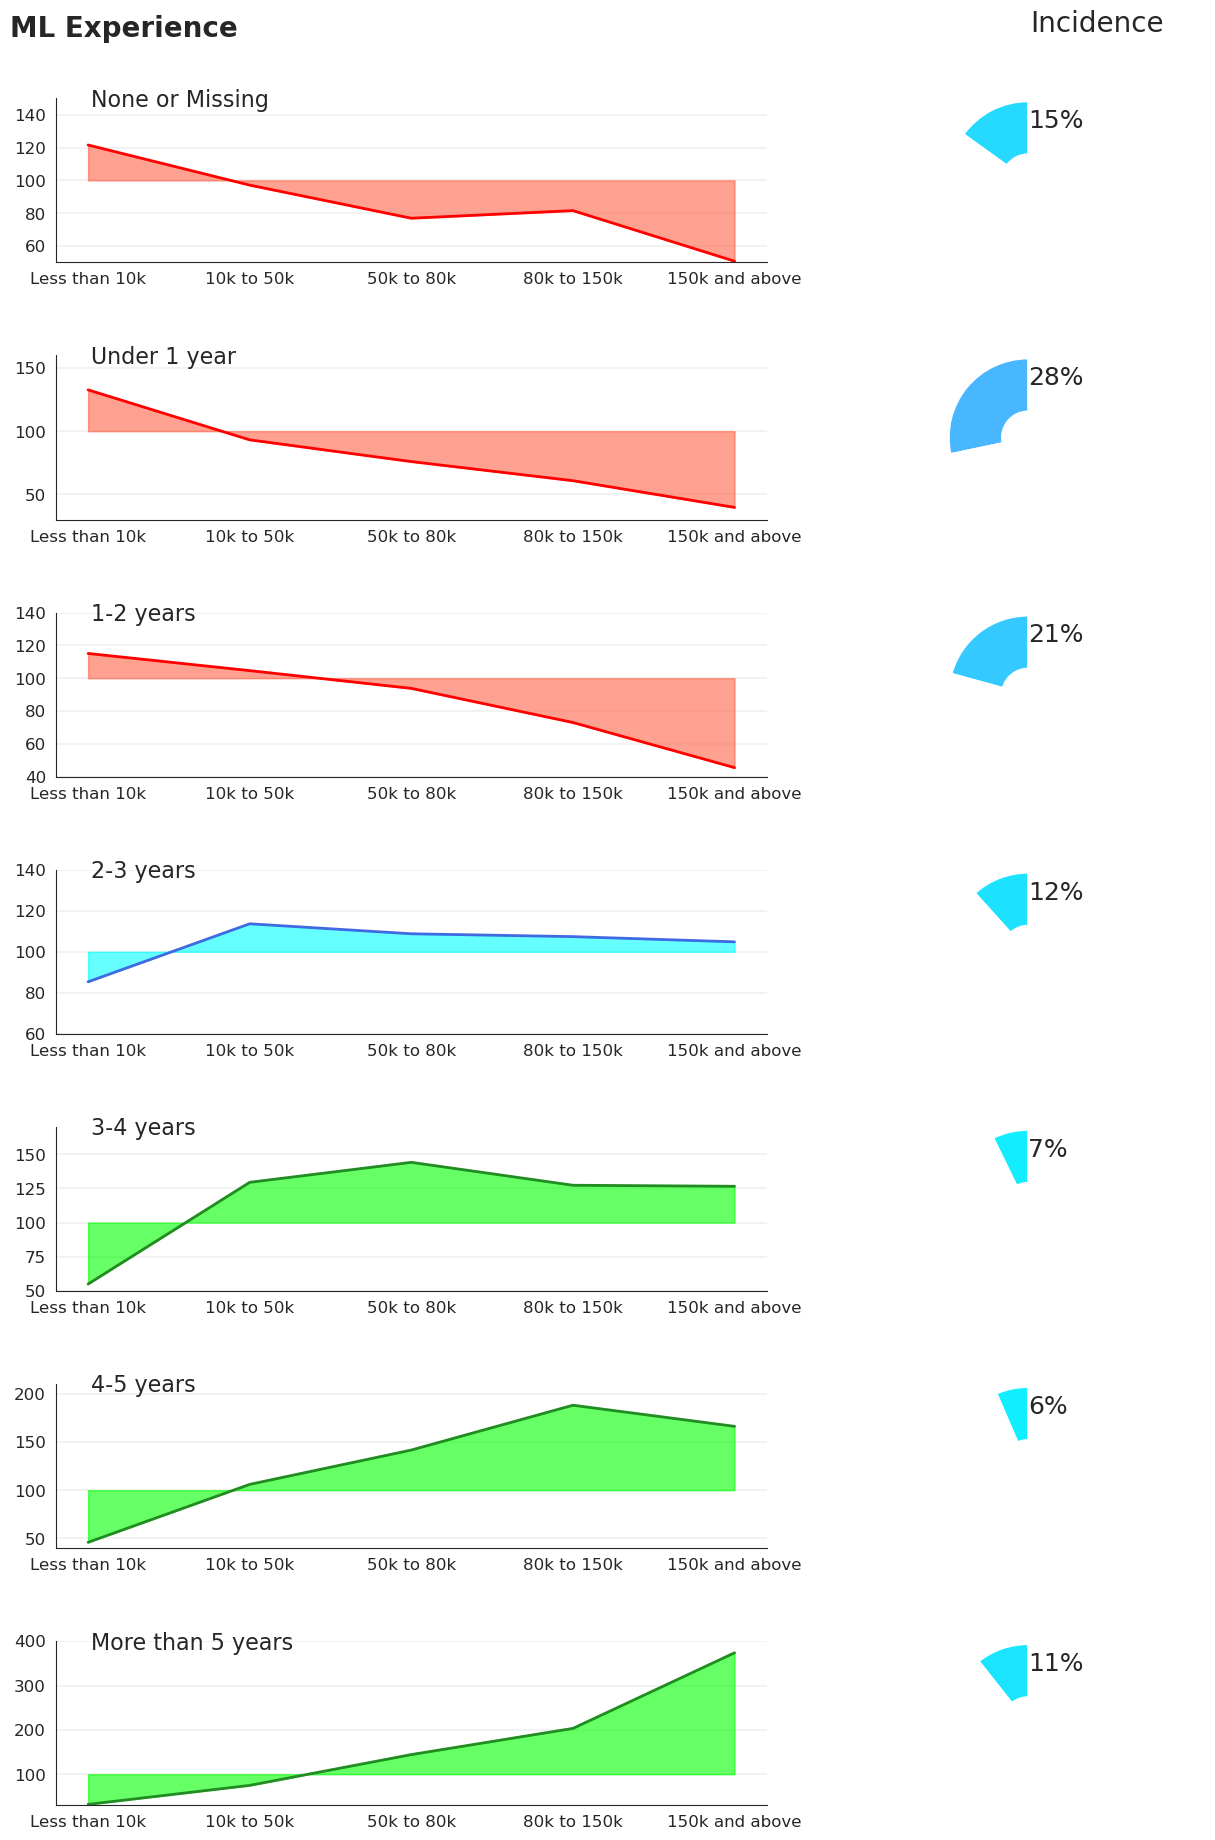

In [20]:
# ML Experience
kaggle_2020["ML Experience"].fillna("Missing", inplace = True)
kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].apply(lambda x: "None or Missing" if x in ["Missing", "I do not use machine learning methods"] else x)
kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].apply(lambda x: "More than 5 years" if x in ["5-10 years", "10-20 years", "20 or more years"] else x)

ml_exp_order = CategoricalDtype(
    ["None or Missing", "Under 1 year", "1-2 years","2-3 years", "3-4 years", "4-5 years", "More than 5 years"], 
    ordered=True
)
ml_exp_list = ["None or Missing", "Under 1 year", "1-2 years","2-3 years", "3-4 years", "4-5 years", "More than 5 years"]

kaggle_2020["ML Experience"] = kaggle_2020["ML Experience"].astype(ml_exp_order)
kaggle_2020.sort_values("ML Experience", inplace = True)
ml_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Experience"]], "Earnings", "ML Experience")
create_plot(ml_list, "ML Experience")

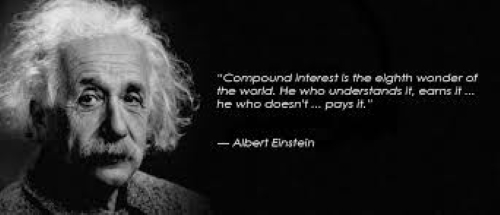

**The only source of knowledge is experience**  - Albert Einstein

Joining coursework or staking knowledge up might be helpful for short-term boosting, but you need patience to absorb what you have learned to your genuine thing.

`You need time to be succeded like other jobs`

🎯 **It could be marathon, not a sprint race**

# Tools/Softwares

* Which languages/tools/softwares would be needed to grab a success at the field?
* What are basic requirements?
* What about game-changers?

In [21]:
# Programming Skills
major_progs = ['Python','R','SQL']
minor_progs = ['C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash','MATLAB', 'Progamming None', 'Programming Other']

major_prog_list = []
for list_val in major_progs:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", list_val)
    if ct_out[1] >= 0.1:
        major_prog_list.append(ct_out)

# sort output list
major_prog_list.sort(key = lambda x:x[1], reverse = True)

minor_prog_list = []
for list_val in minor_progs:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", list_val)
    if ct_out[1] >= 0.1:
        minor_prog_list.append(ct_out)

# sort output list
minor_prog_list.sort(key = lambda x:x[1], reverse = True)

## Major Programming Skills

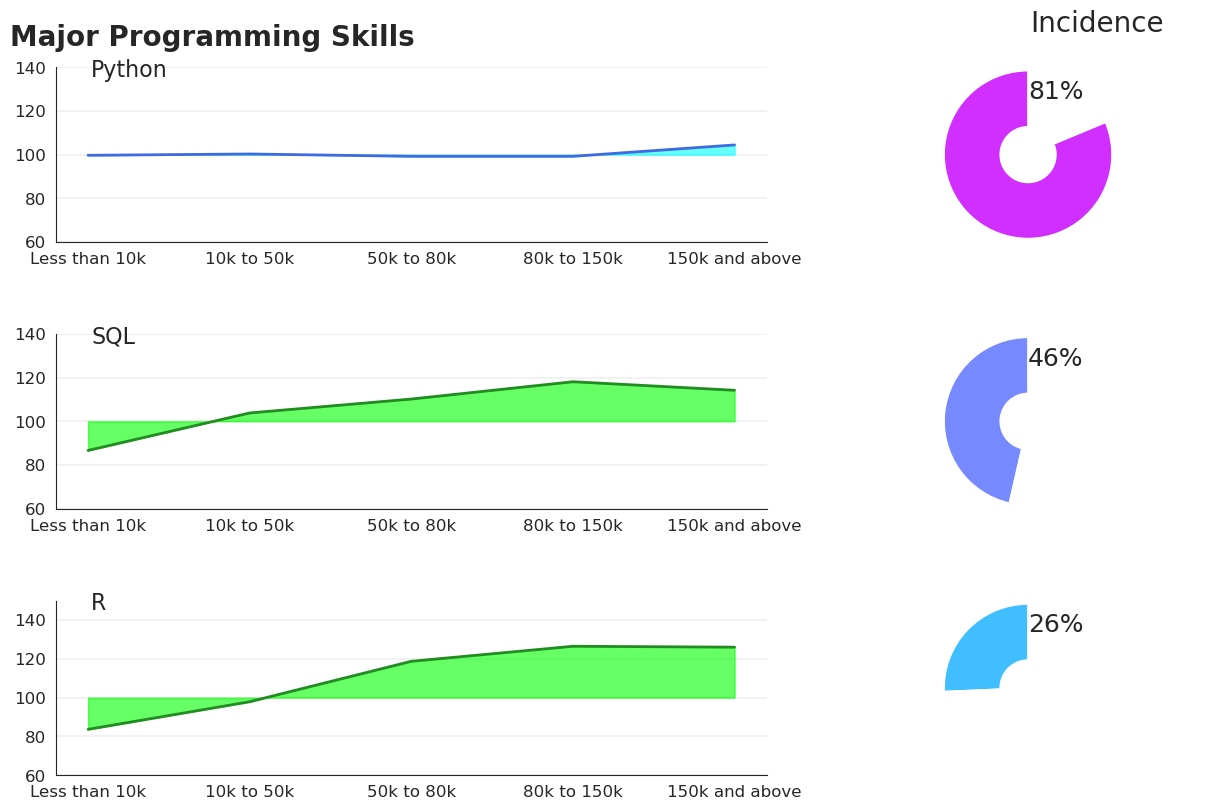

In [22]:
create_plot(major_prog_list, "Major Programming Skills")

* python can be used everywhere
* also choose R as the second langauge
* SQL is between R and python

## Visualization Tools

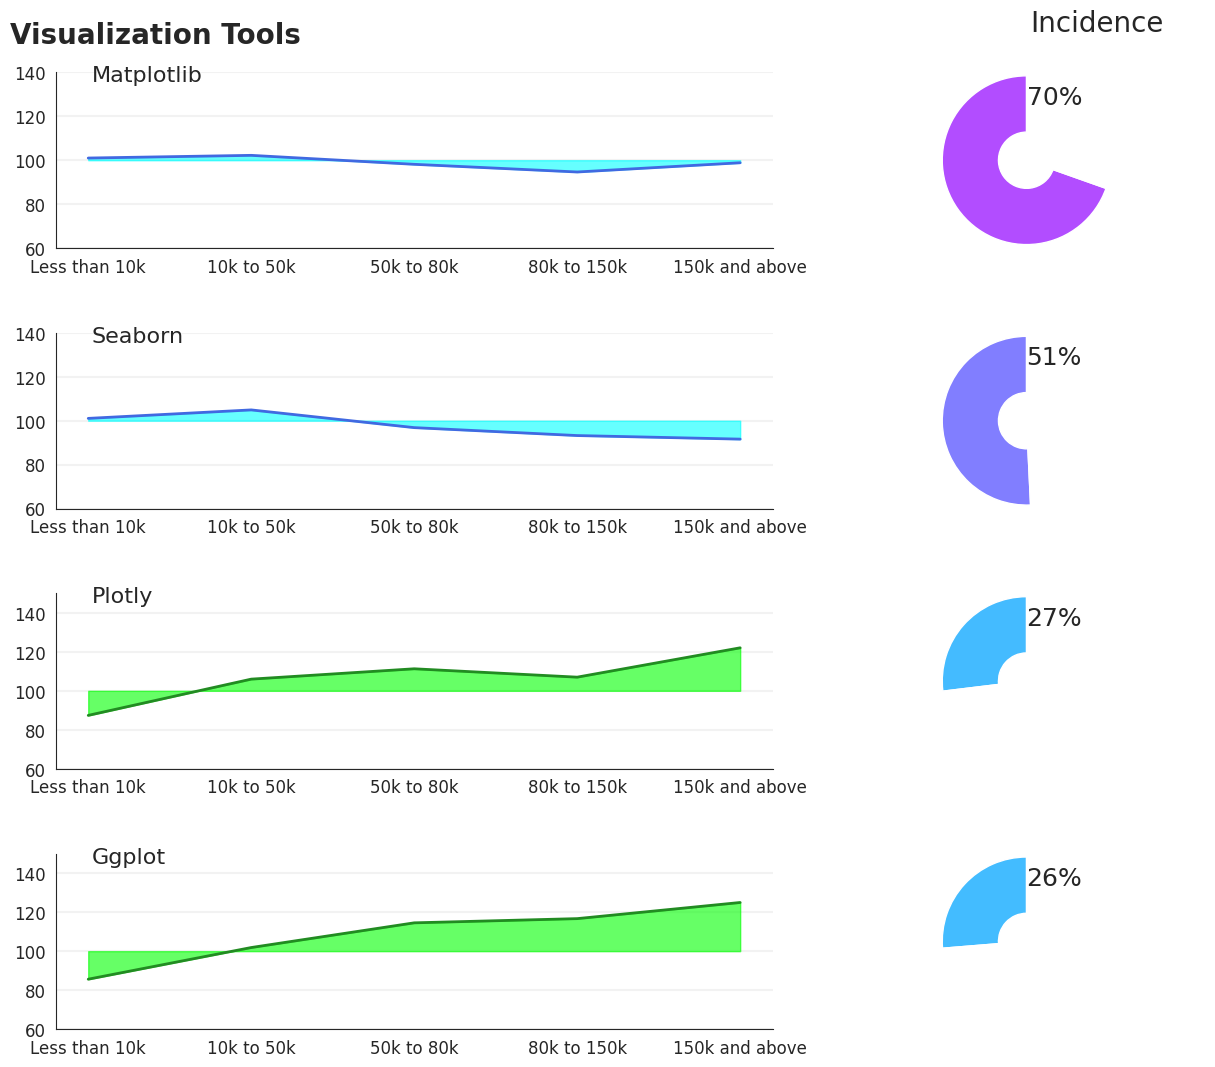

In [26]:
# Visualization
visual_list = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair',
               'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'Visualization None', 'Visualization Other']
visual_out = ['Matplotlib', 'Seaborn', 'Plotly', 'Ggplot', 'Shiny', 'D3 js', 'Altair',
              'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'Visualization None', 'Visualization Other']

visual_usage_list = []
i = 0
for list_val in visual_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", visual_out[i])
    if ct_out[1] >= 0.1:
        visual_usage_list.append(ct_out)
    i +=1

# sort output list
visual_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(visual_usage_list, "Visualization Tools")

* Matplotlib/Seaborn are getting spreaded.
* ggplot follows the trend of R. It would be nice to learn ggplot if your background and role is based on (or more familiar with) R.

🎯 **ploltly will be next-geneartion visualization tool in python**

## Big Data

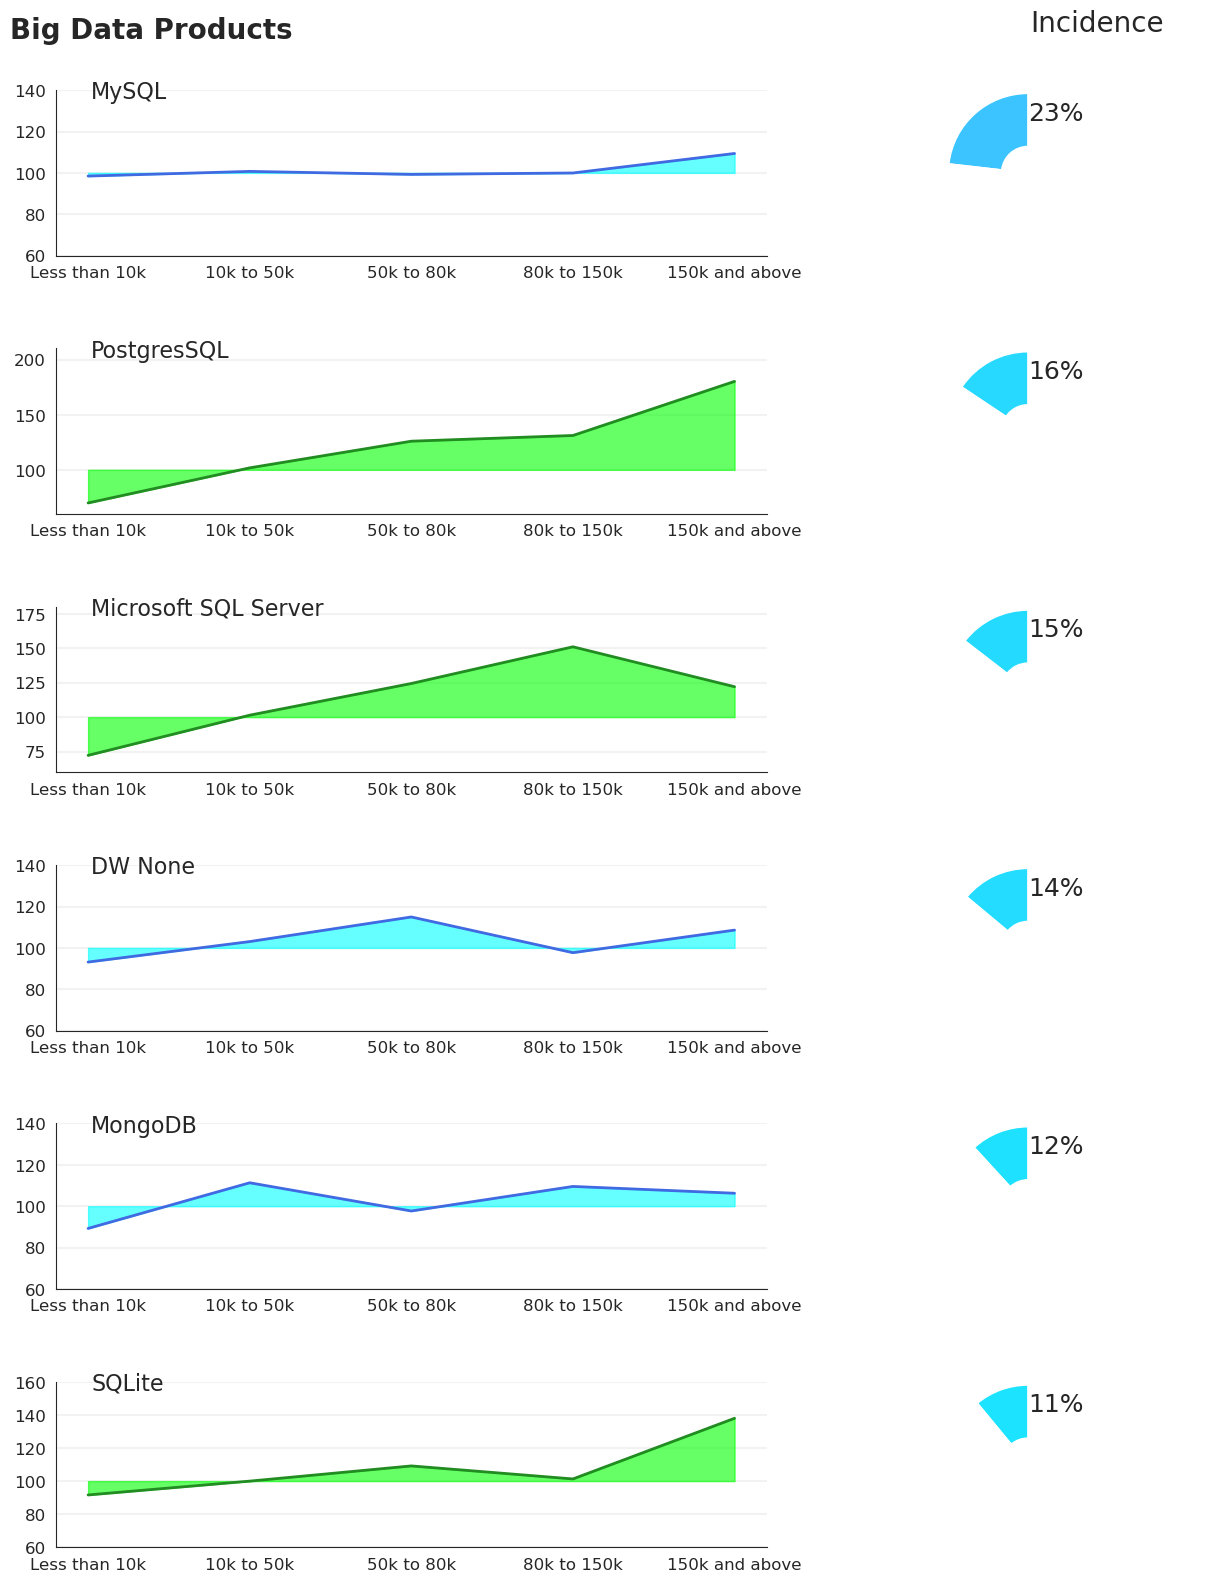

In [23]:
# Big Data Products
big_data_list = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'DW None', 'DW Other']
big_data_out = ['MySQL', 'PostgresSQL', 'SQLite', 'Oracle Database', 'MongoDB', 'Snowflake', 'IBM Db2', 'Microsoft SQL Server',
'Microsoft Access', 'Microsoft Azure Data Lake Storage', 'Amazon Redshift', 'Amazon Athena', 'Amazon DynamoDB',
'Google Cloud BigQuery', 'Google Cloud SQL', 'Google Cloud Firestore', 'DW None', 'DW Other']


big_data_usage_list = []
i = 0
for list_val in big_data_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", big_data_out[i])
    if ct_out[1] >= 0.1:
        big_data_usage_list.append(ct_out)
    i +=1

# sort output list
big_data_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(big_data_usage_list, "Big Data Products")

* Conventional SQL databases sucn as MySQL, SQL Server, PostgreSQL are still in dominant positions
* MongoDB and other NoSQL databases are getting viral

🎯 **Database hasn't much changed so far. Will there be changing trend in the future?**

## BI(Business Intelligence) Tools

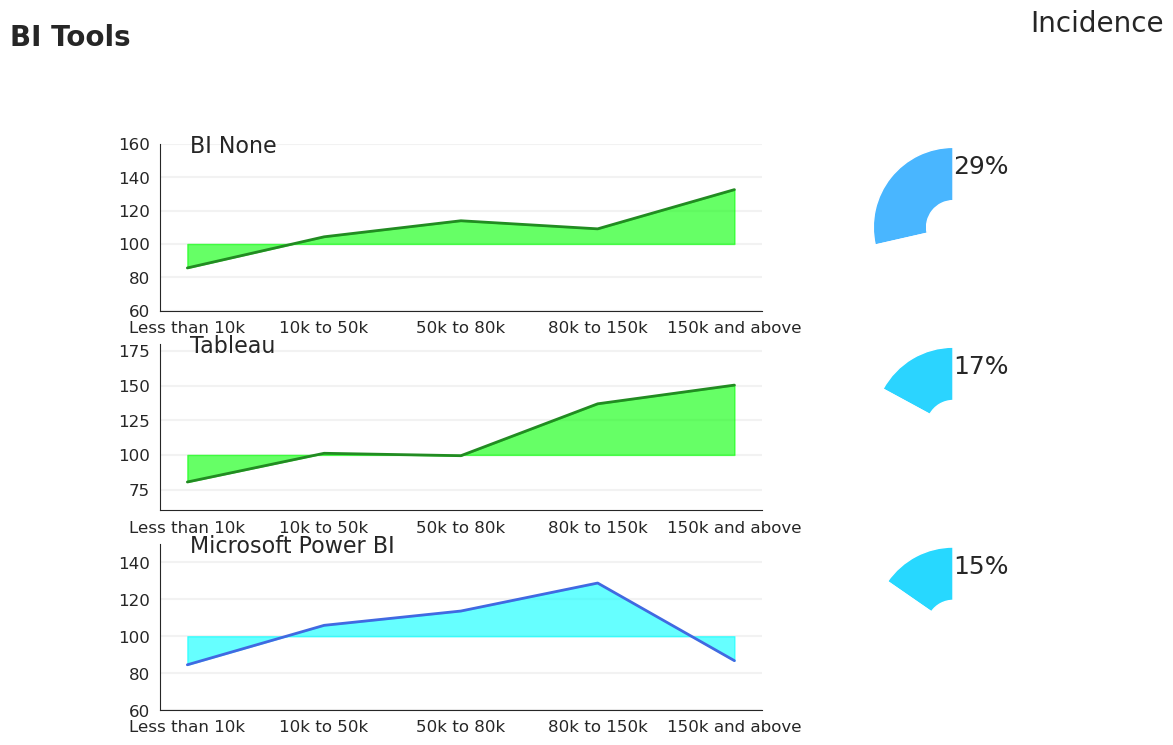

In [24]:
# BI Tools

bi_tools_list = ['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce',
'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud',
'BI None', 'BI Other']
bi_tools_out = ['Amazon QuickSight', 'Microsoft Power BI', 'Google Data Studio', 'Looker', 'Tableau', 'Salesforce',
'Einstein Analytics', 'Qlik', 'Domo', 'TIBCO Spotfire', 'Alteryx', 'Sisense', 'SAP Analytics Cloud',
'BI None', 'BI Other'
]

bi_tools_usage_list = []
i = 0
for list_val in bi_tools_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", bi_tools_out[i])
    if ct_out[1] >= 0.1:
        bi_tools_usage_list.append(ct_out)
    i +=1

# sort output list
bi_tools_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(bi_tools_usage_list, "BI Tools")

* 1 out of 3 despondents don't have BI experience
* Usually in higher side of payroll if someone use BI Tools
* Tableau/Power BI can be seen as the tool to decide their specific roles

🎯  **BI tool usage will varies**

## 주요 분석 도구

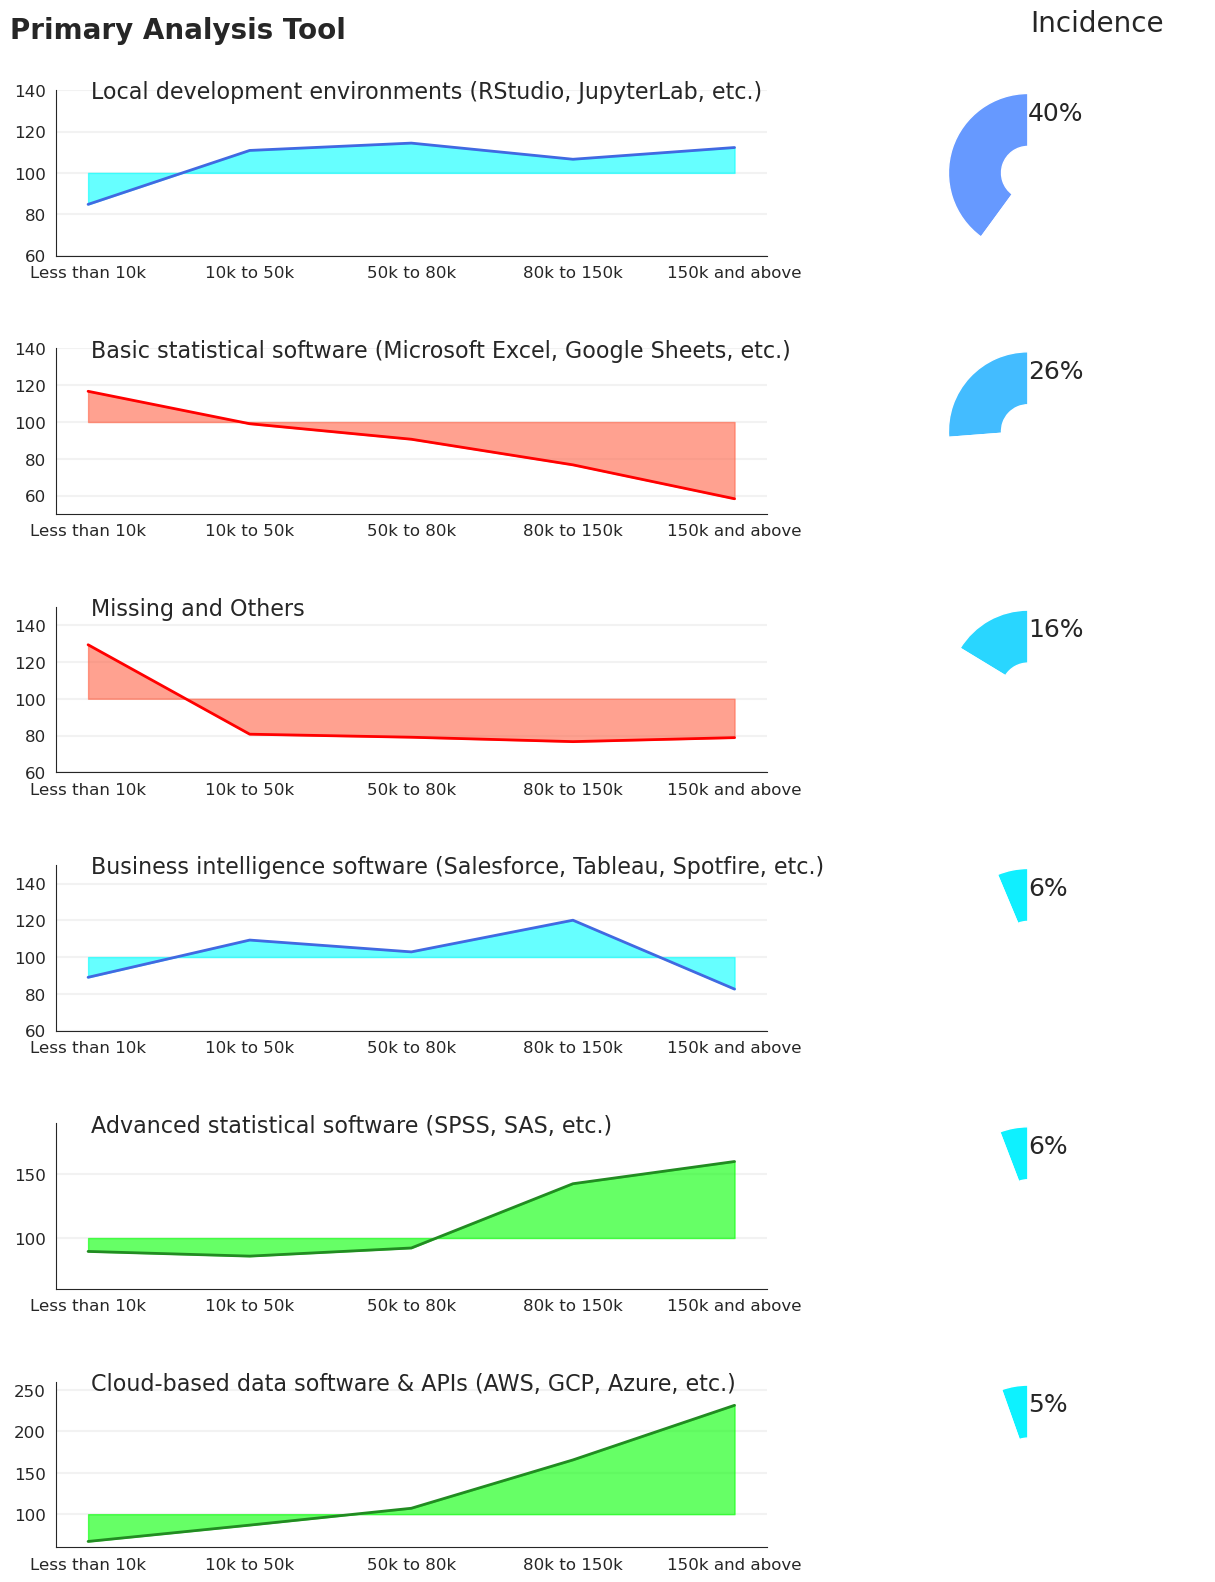

In [25]:
# Primary Analysis Tool

kaggle_2020["Primary Analysis Tool"].fillna("Missing", inplace = True)
kaggle_2020["Primary Analysis Tool"] = kaggle_2020["Primary Analysis Tool"].apply(lambda x: "Missing and Others" if x in ["Missing", "Other"] else x)
analysis_tool_list = cross_tab_mat(kaggle_2020[["Earnings", "Primary Analysis Tool"]], "Earnings", "Primary Analysis Tool")
analysis_tool_list.sort(key=lambda x: x[1], reverse = True)
create_plot(analysis_tool_list, "Primary Analysis Tool")

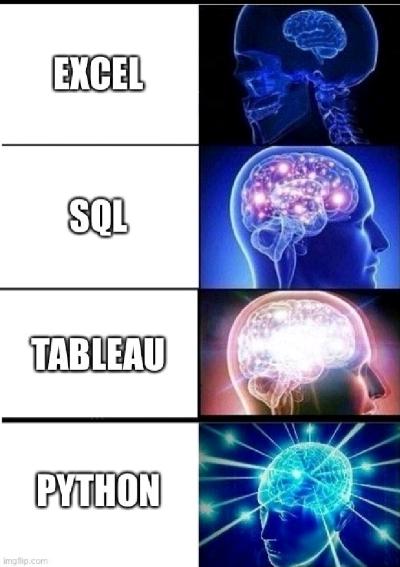

* The field of data science does keep growing up. Usage share of conventional office tool (Excel especially) gradually loses its portion
* SAS and SPSS have still high share of the field

🎯 In Data Science field, Excel is for kids

# Machine Learning Technique

## Framework

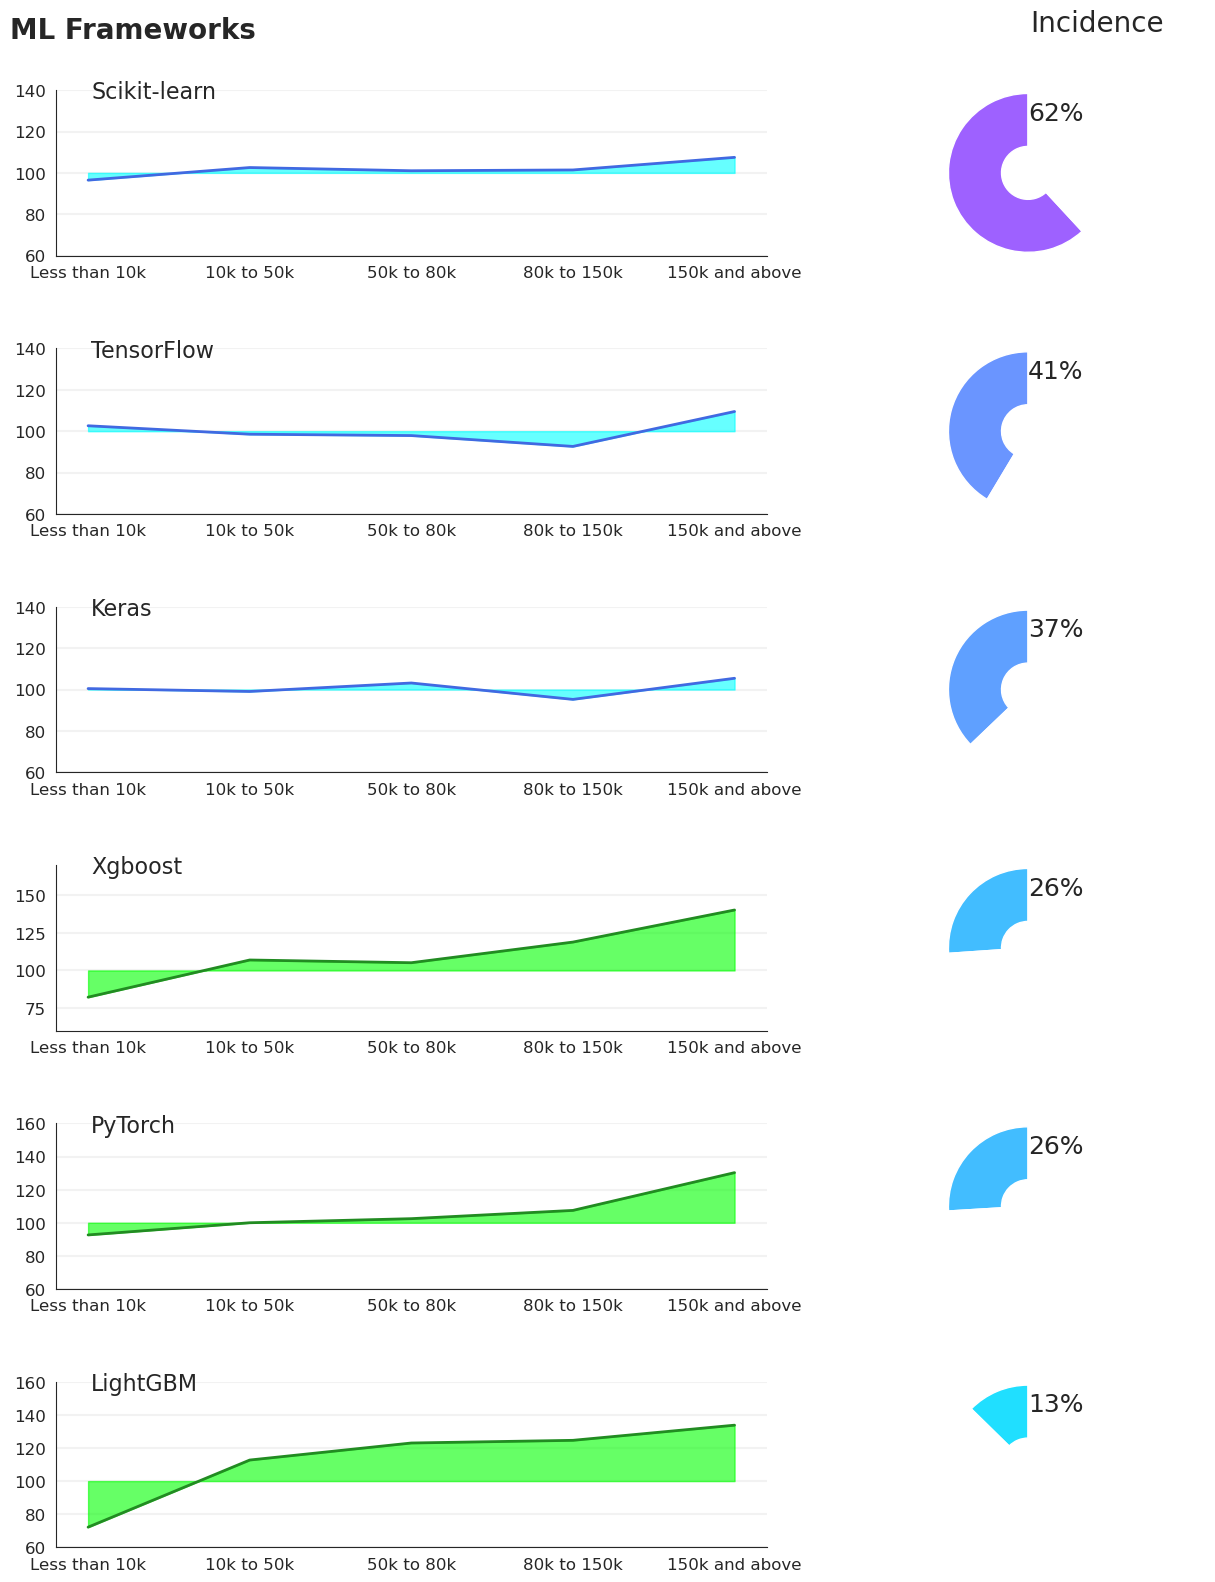

In [26]:
# ML Frameworks

ml_frame = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet',
'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'ML None', 'ML Other']

ml_frame_out = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet',
'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'ML None', 'ML Other'
]

ml_frame_list = []
i = 0
for list_val in ml_frame:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_frame_out[i])
    if ct_out[1] >= 0.1:
        ml_frame_list.append(ct_out)
    i +=1

# sort output list
ml_frame_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_frame_list, "ML Frameworks")

* Scikit learn is the first step of Data Science
* TnsorFlow/Keras: widely used.
* PyTorch: Brand-new ML gadget (Based on the result in 2020, which data was extracted at)

## Machine Learning Algorithm

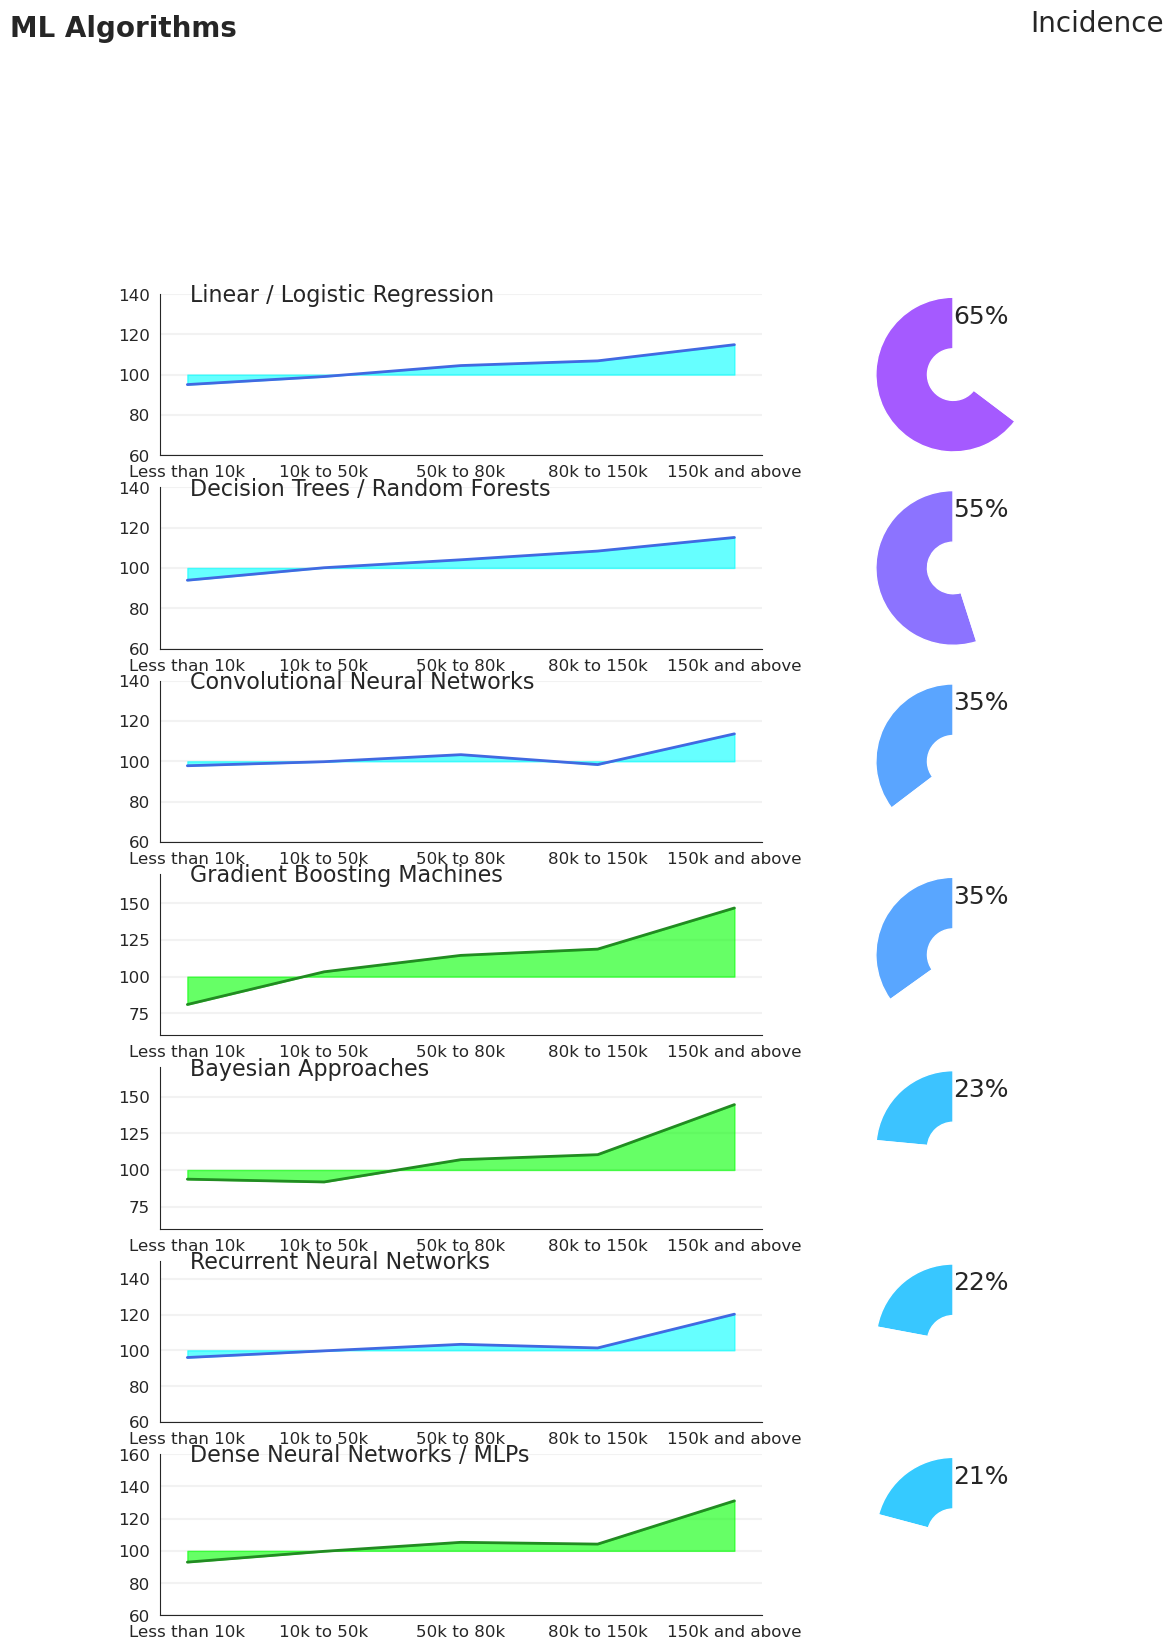

In [27]:
# ML Algorithms

ml_algo = ['Linear or Logistic Regression','Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks',
'Generative Adversarial Networks','Recurrent Neural Networks','Transformer Networks (BERT, gpt-3, etc)',
'ML Algorithms None','ML Algo Other']

ml_algo_out = ['Linear / Logistic Regression','Decision Trees / Random Forests', 'Gradient Boosting Machines',
'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks / MLPs', 'Convolutional Neural Networks',
'Generative Adversarial Networks','Recurrent Neural Networks','Transformer Networks','ML Algorithms None','ML Algo Other'
]

ml_algo_list = []
i = 0
for list_val in ml_algo:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_algo_out[i])
    if ct_out[1] >= 0.1:
        ml_algo_list.append(ct_out)
    i +=1

# sort output list
ml_algo_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_algo_list, "ML Algorithms")

* Regression/Forest are everywhere
* It was impressive that Neural Networks are widely used. It shows us how fast the newly released technology is generalized

## Computer Vision Methodology

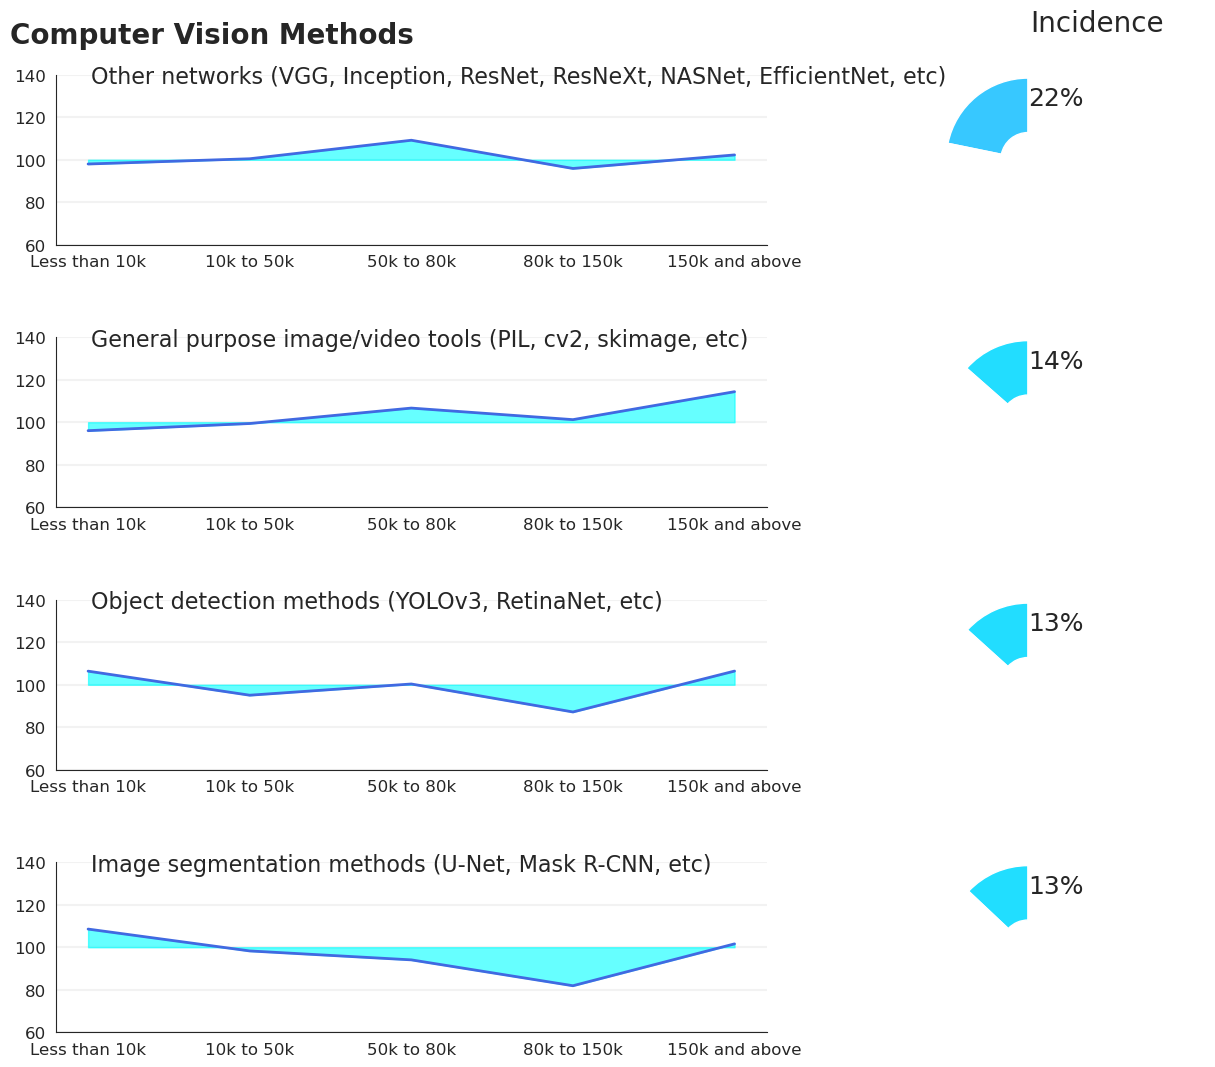

In [28]:
# Computer Vision Methods

cv_methods = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
'Object detection methods (YOLOv3, RetinaNet, etc)', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
'Generative Networks (GAN, VAE, etc)', 'CV None', 'CV Other',
]

cv_methods_out = ['General purpose image/video tools (PIL, cv2, skimage, etc)', 'Image segmentation methods (U-Net, Mask R-CNN, etc)',
'Object detection methods (YOLOv3, RetinaNet, etc)', 'Other networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
'Generative Networks (GAN, VAE, etc)', 'CV None', 'CV Other']


cv_methods_list = []
i = 0
for list_val in cv_methods:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", cv_methods_out[i])
    if ct_out[1] >= 0.1:
        cv_methods_list.append(ct_out)
    i +=1

# sort output list
cv_methods_list.sort(key = lambda x:x[1], reverse = True)

create_plot(cv_methods_list, "Computer Vision Methods")


* CV Algorithm is also getting chosen pretty fast

## Natural Language Processing Tools

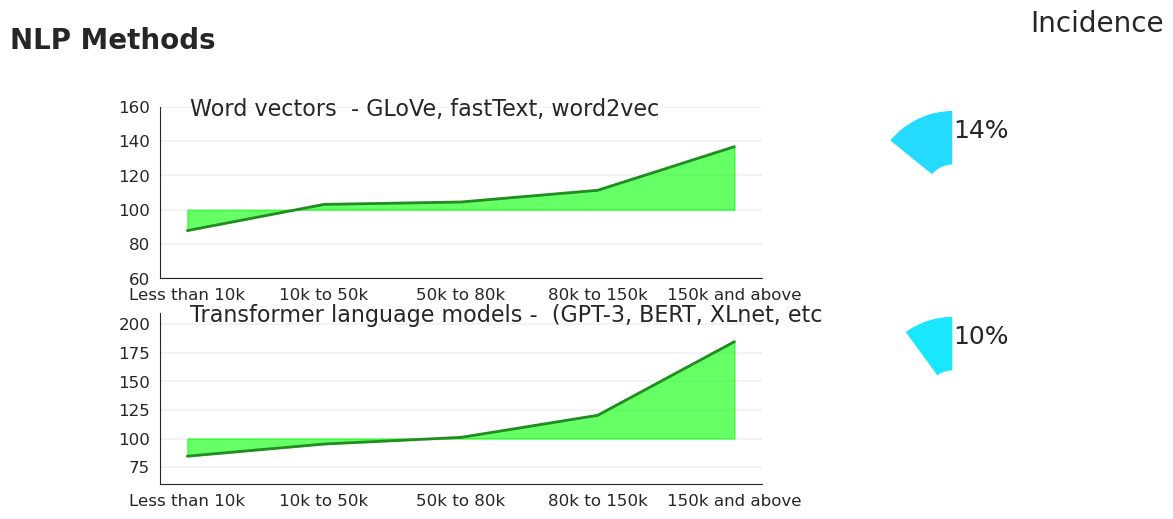

In [29]:
# NLP Tools

nlp_methods = ['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Encoder-decorder models (seq2seq, vanilla transformers)',
               'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)',
               'NLP None', 'NLP Other']

nlp_methods_out = ['Word vectors  - GLoVe, fastText, word2vec',
'Encoder-decorder models - seq2seq, vanilla transformers',
'Contextualized embeddings - ELMo, CoVe',
'Transformer language models -  (GPT-3, BERT, XLnet, etc',
'NLP None', 'NLP Other']


nlp_methods_list = []
i = 0
for list_val in nlp_methods:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", nlp_methods_out[i])
    if ct_out[1] >= 0.1:
        nlp_methods_list.append(ct_out)
    i +=1

# sort output list
nlp_methods_list.sort(key = lambda x:x[1], reverse = True)

create_plot(nlp_methods_list, "NLP Methods")

* NLP would be next game-changer
* If you're familiar with regression and forest, it'd be better to try NLP

# How to learn

We have reviewed what to do. It's the time to check how to learn

## Diploma/Degree

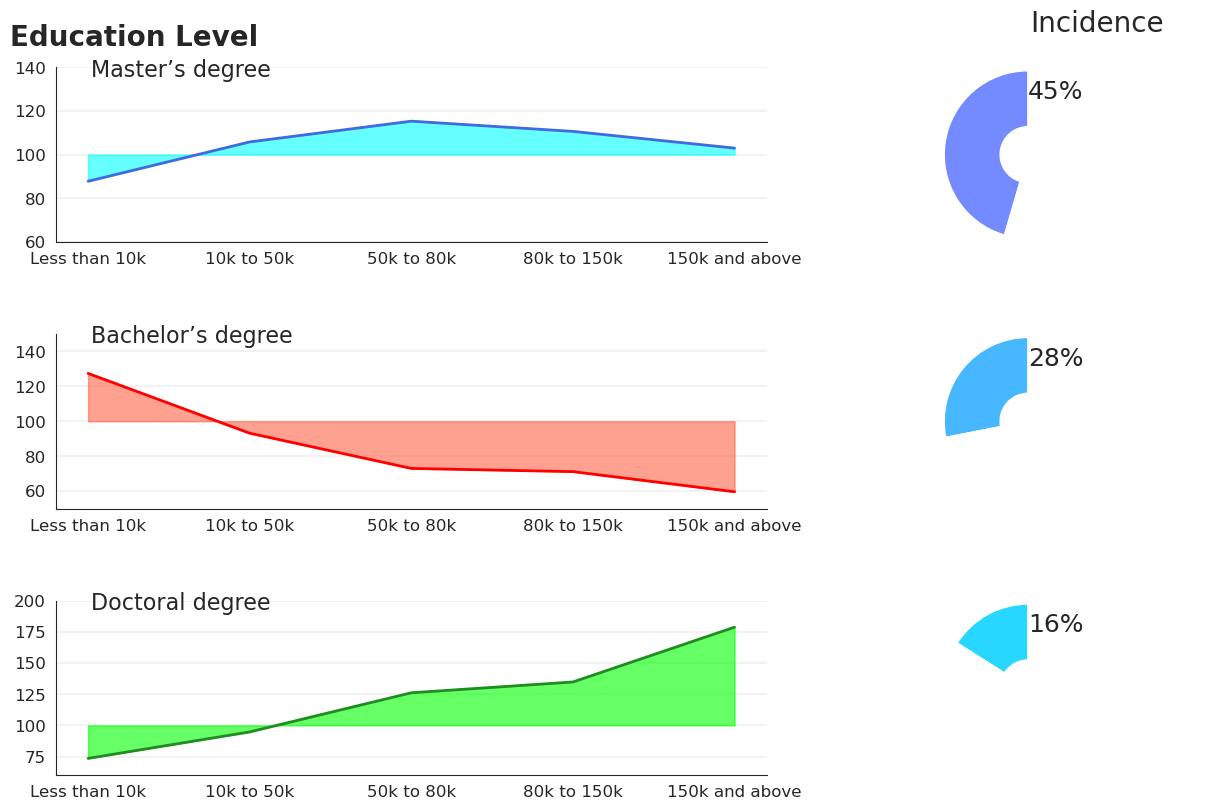

In [30]:
# Education
edu_dict = {
    "Master’s degree" : "Master’s degree", "Bachelor’s degree" : "Bachelor’s degree",
    "Doctoral degree" : "Doctoral degree", 
    "Professional degree" : "Professional degree",
    "Some college/university study without earning a bachelor’s degree" : "Unfinished College",
    "Others": "Others", "I prefer not to answer" : "Others", 
    "No formal education past high school"  : "Others"
}

kaggle_2020["Education"] = kaggle_2020["Education Level"].replace(edu_dict)
education_list = cross_tab_mat(kaggle_2020[["Earnings", "Education"]], "Earnings", "Education")
education_list.sort(key=lambda x: x[1], reverse = True)
create_plot(education_list, "Education Level")

* 50% of respondents have advanced degrees(e.g., Master's degree)
* 1/4 of respondents are Indian.
* PhD course would be meaningful in payroll enhancement

## Learning cost of ML

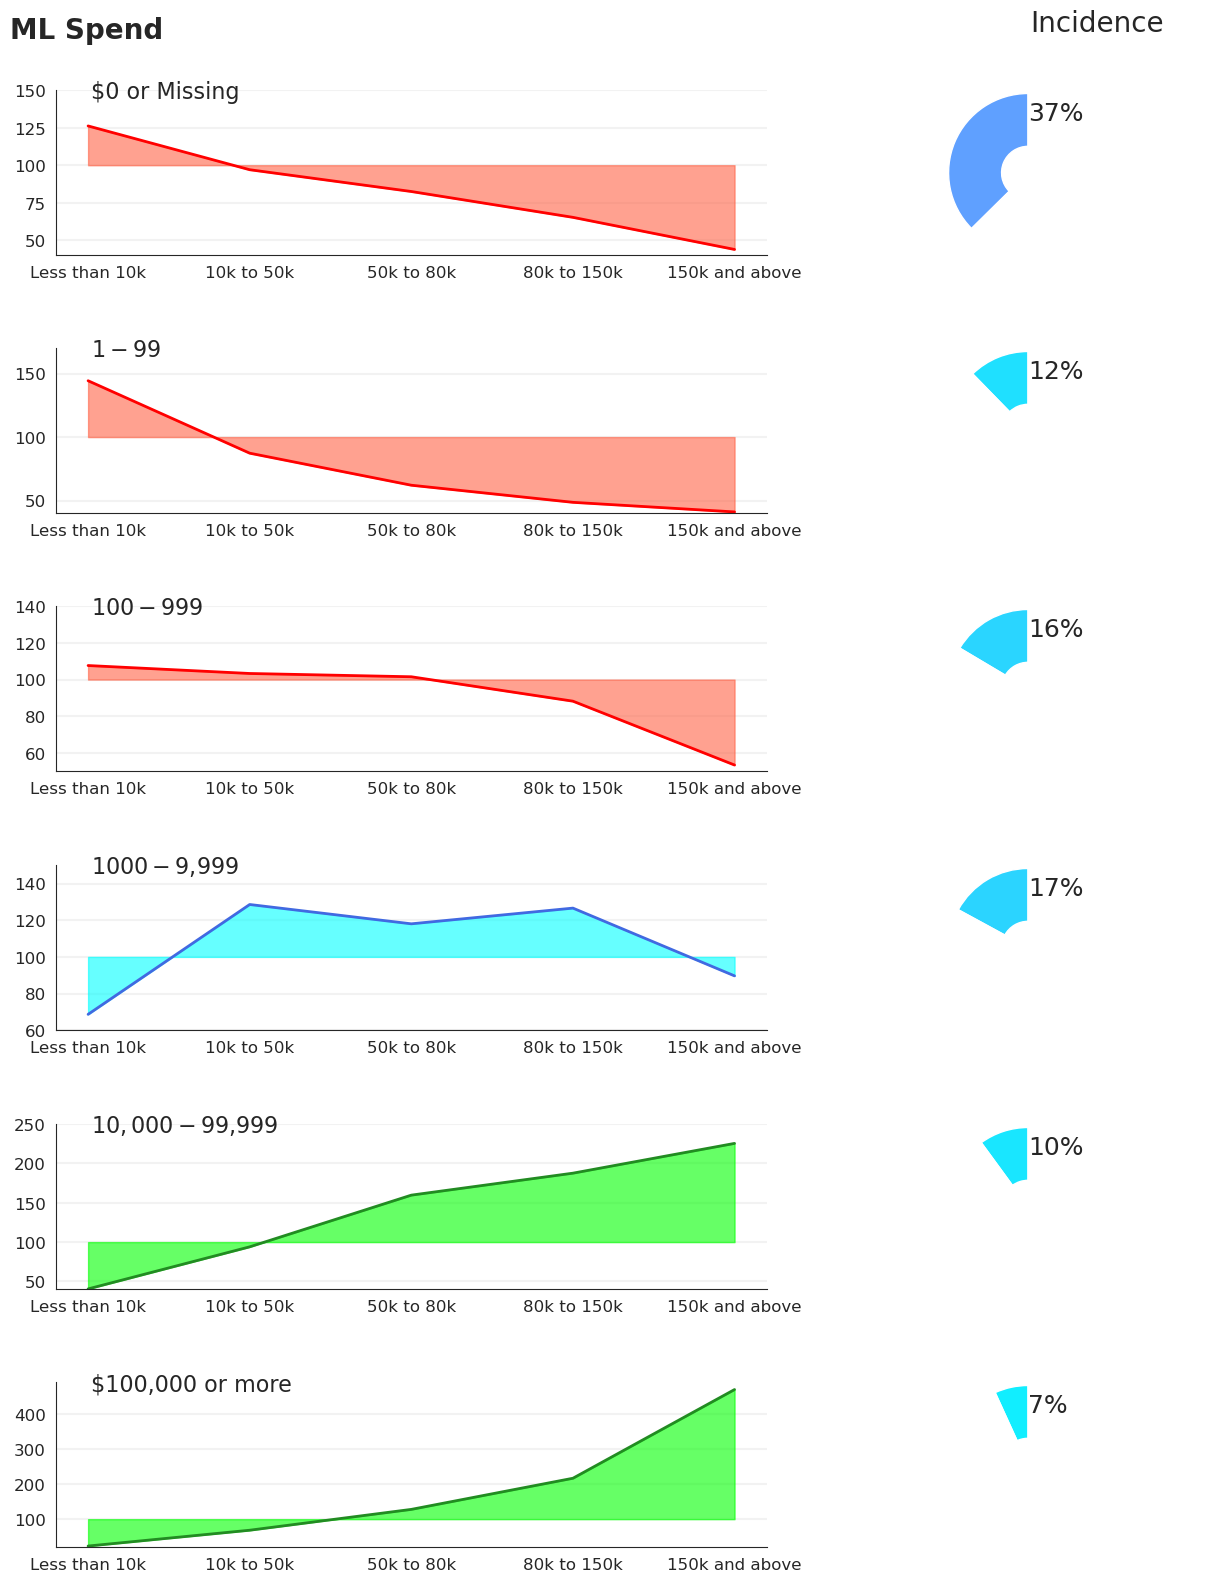

In [31]:
# ML Spend

kaggle_2020["ML Spend"].fillna("Missing", inplace = True)
kaggle_2020["ML Spend"] = kaggle_2020["ML Spend"].apply(lambda x: "$0 or Missing" if x in ["Missing", "$0 ($USD)"] else x)
kaggle_2020["ML Spend"] = kaggle_2020["ML Spend"].apply(lambda x: "$100,000 or more" if x in ["$100,000 or more ($USD)"] else x)


ml_spend_order = CategoricalDtype(
    ["$0 or Missing", "$1-$99", "$100-$999", "$1000-$9,999", "$10,000-$99,999", "$100,000 or more"], 
    ordered=True
)

ml_spend_list = ["$0 or Missing", "$1-$99", "$100-$999", "$1000-$9,999", "$10,000-$99,999", "$100,000 or more"]

kaggle_2020["ML Spend Order"] = kaggle_2020["ML Spend"].astype(ml_spend_order)
kaggle_2020.sort_values("ML Spend Order", inplace = True)
ml_spend_order_list = cross_tab_mat(kaggle_2020[["Earnings", "ML Spend Order"]], "Earnings", "ML Spend Order")
create_plot(ml_spend_order_list, "ML Spend")


* 비용이 많이 들어가는 강의가 성과있음
* 무료강좌가 인기 있을 수 있지만 가치가 더해지진 않는 것 같음

`이 자료는 지난 5년간의 자료임. 회사에서 지원하는 과정도 포함되긴 때문에 지출이 높은 것은 그렇게 놀라운 정보는 아님`

🎯 **공부에 투자한 만큼 벌 수 있음. 돈을 많이 써야 수입을 더 많이 늘릴 수 있음**

## 머신러닝 학습 플랫폼

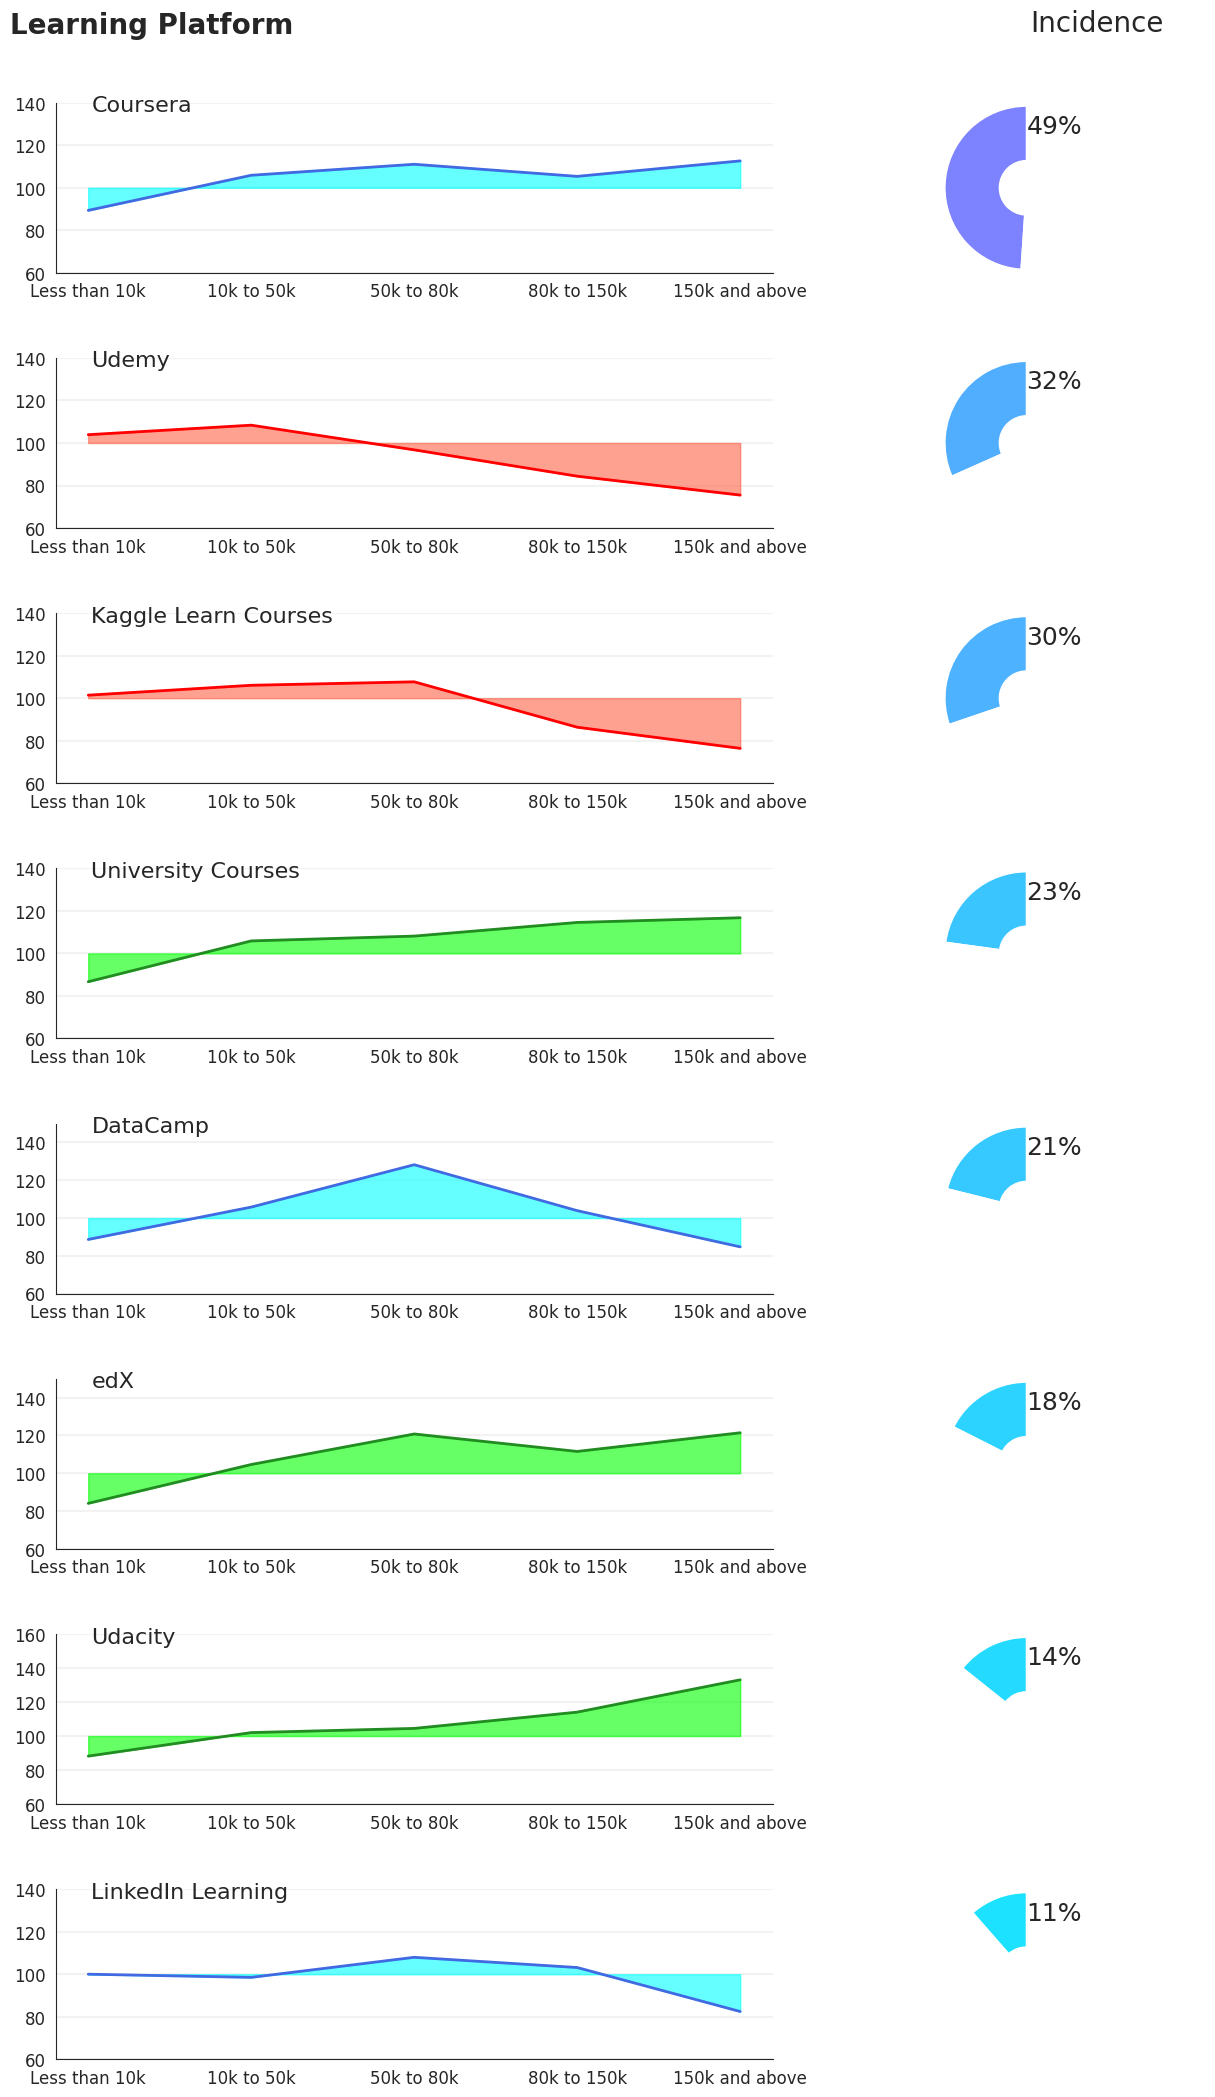

In [37]:
# ML Learning Platform

ml_learn_list = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai Learning', 'Udacity', 'Udemy',
'LinkedIn Learning','Cloud-certification programs (direct from AWS, Azure, GCP, or similar)',
'University Courses (resulting in a university degree)','Learn ML None',
'Learn ML Other']
ml_learn_out = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai Learning', 'Udacity', 'Udemy',
'LinkedIn Learning','Cloud-certification - AWS, Azure, GCP',
'University Courses','None',
'Others',
]

ml_learn_usage_list = []
i = 0
for list_val in ml_learn_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ml_learn_out[i])
    if ct_out[1] >= 0.1:
        ml_learn_usage_list.append(ct_out)
    i +=1

# sort output list
ml_learn_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ml_learn_usage_list, "Learning Platform")

* Kaggle, Udamy 같은 무료 또는 저가 코스는 하위 소득에 인기가 있음
* 중저가 가격대인 DataCamp나 LinkedIn은 중위 소득자들에게 인기가 있음
* 대규모 MOOC들 중에 Cousera는 가장 인기 있는 코스이고 응답자의 절반이 사용함
* 응답자의 1/4 정도가 대학에 진학함

🎯 **플랫폼 선택은 소비를 반영함**

# 6. 학습을 계속하는 방법

데이터 사이언스는 유동적이기 떄문에 전문가들은 계속 공부하면서 스스로 업그레이드 해야 함

수입이 높은 그룹의 지식 공유(Knowledge Sharing) 및 학습 방법을 살펴볼 필요가 있음

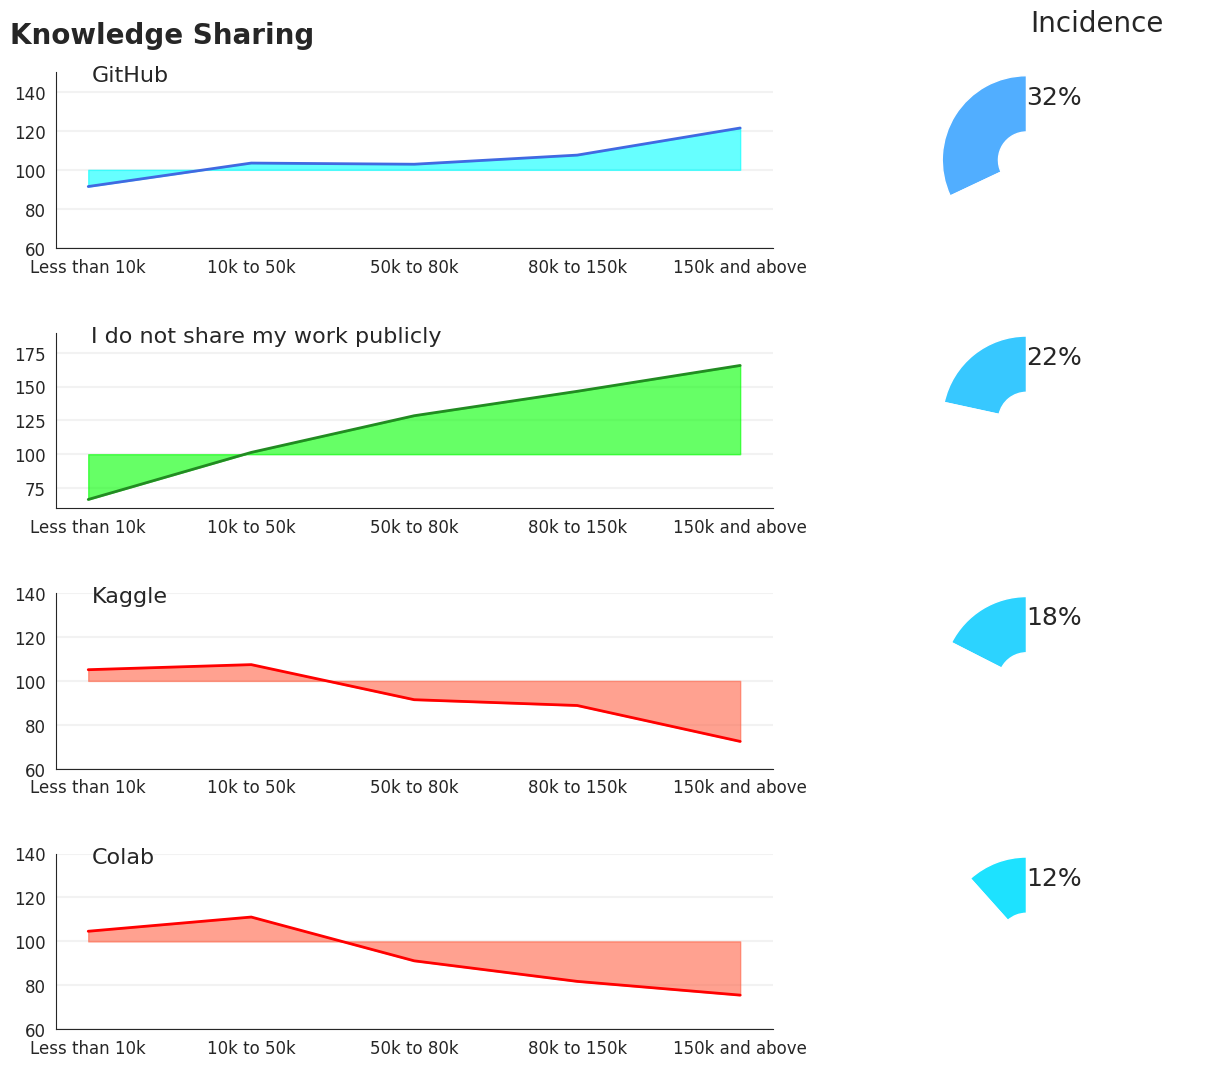

In [39]:
# Knowledge Sharing

sharing_list = ['Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal blog', 'Kaggle', 'Colab',
'Shiny Deploy', 'I do not share my work publicly', 'Deploy Other']
sharing_out = ['Plotly Dash', 'Streamlit', 'NBViewer', 'GitHub', 'Personal blog', 'Kaggle', 'Colab',
'Shiny Deploy', 'I do not share my work publicly', 'Other'
]

sharing_usage_list = []
i = 0
for list_val in sharing_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", sharing_out[i])
    if ct_out[1] >= 0.1:
        sharing_usage_list.append(ct_out)
    i +=1

# sort output list
sharing_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(sharing_usage_list, "Knowledge Sharing")

* Github은 선택받은 플랫폼임
* 응답자의 1/5는 공유하지 않음. 이 비율은 수입에 따라 증가함
* 불행히도 Kaggle과 Colab은 이 문재로 인해 고통받고 있음

🎯 **고소득자가 이기적일 이유는 없음. 단순히 많이 받는 만큼 책임과 추가되는 일 때문에 바쁜 것이 문제일 수 있음** 


## 데이터 사이언스 미디어

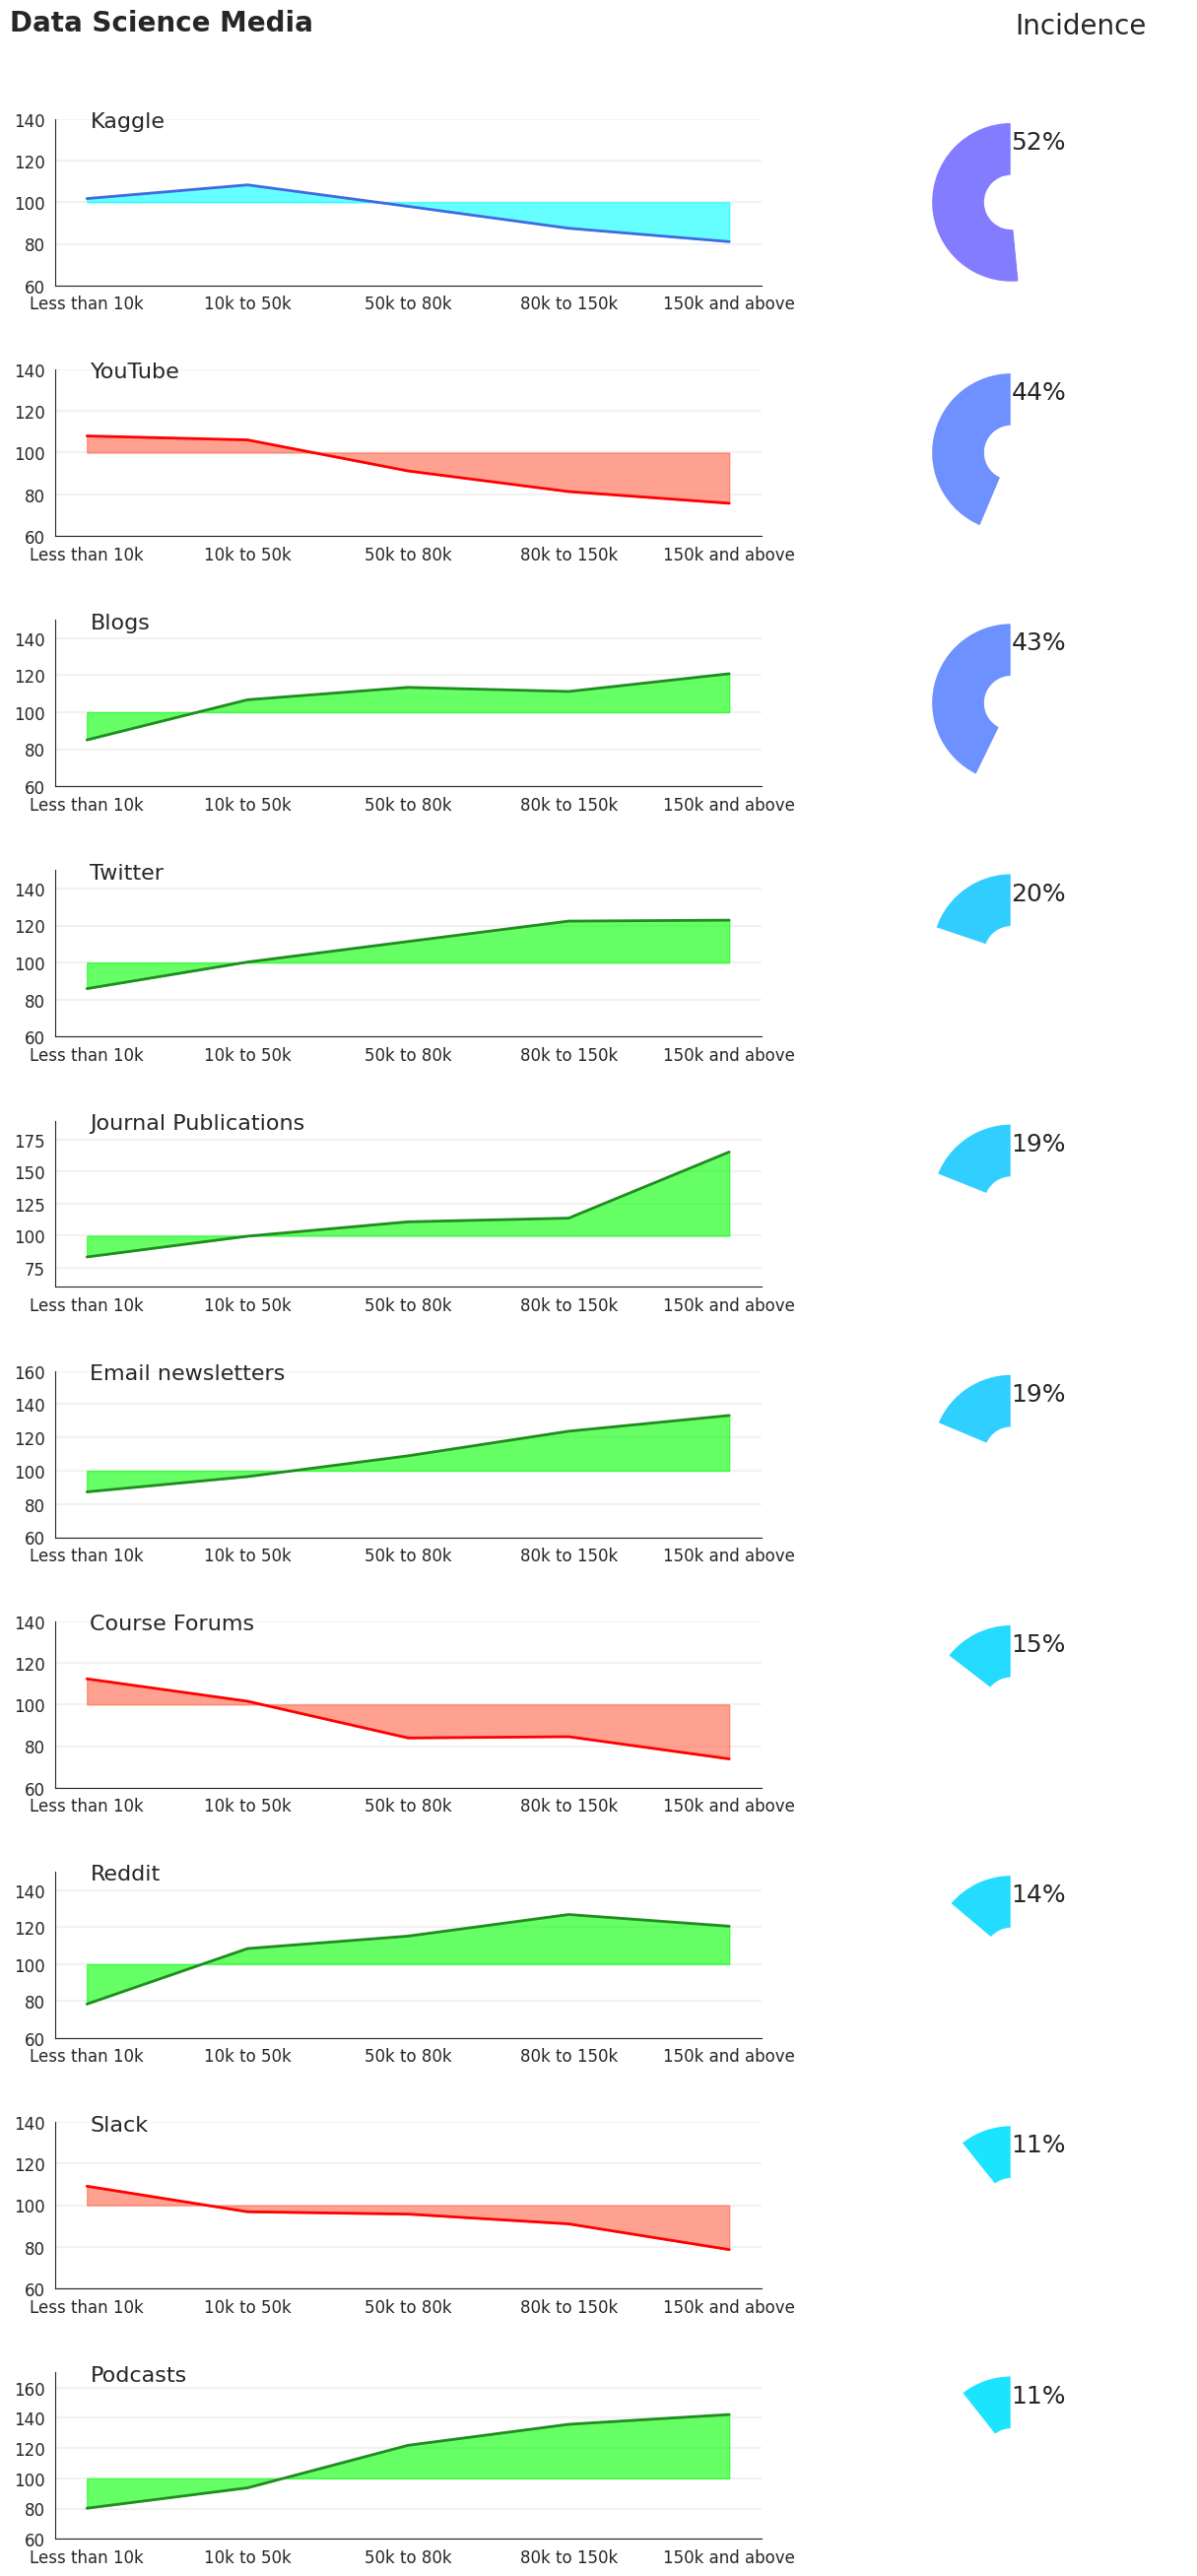

In [40]:
# Data Science Media

ds_media_list = ['Twitter (data science influencers)', "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
'Reddit (r/machinelearning, etc)', 'Kaggle (notebooks, forums, etc)', 'Course Forums (forums.fast.ai, Coursera forums, etc)',
'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)', 'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
'Blogs (Towards Data Science, Analytics Vidhya, etc)', 'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
'Slack Communities (ods.ai, kagglenoobs, etc)', 'Media None', 'Media Other',
]


ds_media_out = ['Twitter', "Email newsletters", 'Reddit', 'Kaggle', 'Course Forums',
'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack', 'Media None', 'Media Other'
]

ds_media_usage_list = []
i = 0
for list_val in ds_media_list:
    ct_out = cross_tab_row(kaggle_2020[["Earnings", list_val]], list_val, "Earnings", ds_media_out[i])
    if ct_out[1] >= 0.1:
        ds_media_usage_list.append(ct_out)
    i +=1

# sort output list
ds_media_usage_list.sort(key = lambda x:x[1], reverse = True)

create_plot(ds_media_usage_list, "Data Science Media")

* 미디어 소비 트렌드는 지식 공유 트렌드를 따라 감
* 데이터 과학자들은 바쁠수록 커뮤니트를 통한 학습보다 뉴스레터나 기사 같은 단방향 의사소통을 선호함